# Assignment 11 - Zhengxi Shen

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('.../XYZloan_default_selected_vars.csv')

print(df.shape)
df.head()

Mounted at /content/drive
(80000, 89)


Unnamed: 0.1  Unnamed: 0  id  loan_default  AP001  AP002  AP003  AP004  \
0             0           1   1             1     31      2      1     12   
1             1           2   2             0     27      1      1     12   
2             2           3   3             0     33      1      4     12   
3             3           4   4             0     34      2      4     12   
4             4           5   5             0     47      2      1     12   

            AP005    AP006  ...  CD162  CD164  CD166  CD167   CD169   CD170  \
0  2017/7/6 10:21      ios  ...   13.0   13.0    0.0    0.0  1449.0  1449.0   
1  2017/4/6 12:51       h5  ...  -99.0  -99.0  -99.0  -99.0   -99.0   -99.0   
2  2017/7/1 14:11       h5  ...    3.0    2.0   33.0    0.0    33.0     0.0   
3  2017/7/7 10:10  android  ...    0.0    0.0    0.0    0.0     0.0     0.0   
4  2017/7/6 14:37       h5  ...  -99.0  -99.0  -99.0  -99.0   -99.0   -99.0   

    CD172   CD173  MB005    MB007  
0  2249.0  2249.0    7.0  IPHONE7  
1   -99.0   -99.0    NaN      WEB  
2   143.0   110.0    8.0      WEB  
3     0.0     0.0   10.0     OPPO  
4   -99.0   -99.0    NaN      WEB  

[5 rows x 89 columns]

In [4]:
# Evaluate the number of normal and abnormal data contain in this dataset
df['loan_default'].value_counts()

0    64512
1    15488
Name: loan_default, dtype: int64

# Feature Engineering

### Split Train and Test data first
#### Test data will be used like furture data we are going to deal in real life data analysis, so we should not include any information, trend or pattern from 'unknown' data during our model training. So as, all the feature engineering will based on traning data and directly applied to test data if this can be done.

In [5]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.3, random_state = 123)

### Detect special values lik 'NaN', '-99', '-98', '0'. And keep them as a category since they usually contain some useful system information.

In [6]:
# '-99', '-98'
mask = (train == -99) | (train == -98)

columns_with_sepcial_val = df.columns[mask.any()]

print(columns_with_sepcial_val)

Index(['PA022', 'PA023', 'PA028', 'PA029', 'PA030', 'PA031', 'CD008', 'CD018',
       'CD071', 'CD072', 'CD088', 'CD100', 'CD101', 'CD106', 'CD107', 'CD108',
       'CD113', 'CD114', 'CD115', 'CD117', 'CD118', 'CD120', 'CD121', 'CD123',
       'CD130', 'CD131', 'CD132', 'CD133', 'CD135', 'CD136', 'CD137', 'CD152',
       'CD153', 'CD160', 'CD162', 'CD164', 'CD166', 'CD167', 'CD169', 'CD170',
       'CD172', 'CD173'],
      dtype='object')


In [7]:
# '0'
columns_with_sepcial_val = train.columns[(train == 0).any()]

print(columns_with_sepcial_val)

Index(['Unnamed: 0.1', 'loan_default', 'AP009', 'TD001', 'TD002', 'TD005',
       'TD006', 'TD009', 'TD010', 'TD013', 'TD014', 'TD015', 'TD023', 'TD024',
       'TD025', 'TD026', 'TD027', 'TD028', 'CR009', 'CR012', 'CR018', 'PA022',
       'PA023', 'PA028', 'PA029', 'PA030', 'PA031', 'CD008', 'CD018', 'CD071',
       'CD072', 'CD088', 'CD100', 'CD101', 'CD106', 'CD107', 'CD108', 'CD113',
       'CD114', 'CD115', 'CD117', 'CD118', 'CD120', 'CD121', 'CD123', 'CD130',
       'CD131', 'CD132', 'CD133', 'CD135', 'CD136', 'CD137', 'CD152', 'CD153',
       'CD160', 'CD162', 'CD164', 'CD166', 'CD167', 'CD169', 'CD170', 'CD172',
       'CD173', 'MB005'],
      dtype='object')


In [8]:
# 'NaN'
columns_with_nan = train.columns[train.isnull().any()]

print(columns_with_nan)

Index(['TD022', 'TD023', 'TD024', 'TD025', 'TD026', 'TD027', 'TD028', 'TD029',
       'TD044', 'TD048', 'TD051', 'TD054', 'TD055', 'TD061', 'TD062', 'PA022',
       'PA023', 'PA028', 'PA029', 'PA030', 'PA031', 'CD008', 'CD018', 'CD071',
       'CD072', 'CD088', 'CD100', 'CD101', 'CD106', 'CD107', 'CD108', 'CD113',
       'CD114', 'CD115', 'CD117', 'CD118', 'CD120', 'CD121', 'CD123', 'CD130',
       'CD131', 'CD132', 'CD133', 'CD135', 'CD136', 'CD137', 'CD152', 'CD153',
       'CD160', 'CD162', 'CD164', 'CD166', 'CD167', 'CD169', 'CD170', 'CD172',
       'CD173', 'MB005'],
      dtype='object')


In [9]:
# Create a full list of all the column contain special values

mask = (train == -99) | (train == -98) | train.isnull() | (train == 0)

columns_with_sepcial_val = train.columns[mask.any()]

print(columns_with_sepcial_val)

Index(['Unnamed: 0.1', 'loan_default', 'AP009', 'TD001', 'TD002', 'TD005',
       'TD006', 'TD009', 'TD010', 'TD013', 'TD014', 'TD015', 'TD022', 'TD023',
       'TD024', 'TD025', 'TD026', 'TD027', 'TD028', 'TD029', 'TD044', 'TD048',
       'TD051', 'TD054', 'TD055', 'TD061', 'TD062', 'CR009', 'CR012', 'CR018',
       'PA022', 'PA023', 'PA028', 'PA029', 'PA030', 'PA031', 'CD008', 'CD018',
       'CD071', 'CD072', 'CD088', 'CD100', 'CD101', 'CD106', 'CD107', 'CD108',
       'CD113', 'CD114', 'CD115', 'CD117', 'CD118', 'CD120', 'CD121', 'CD123',
       'CD130', 'CD131', 'CD132', 'CD133', 'CD135', 'CD136', 'CD137', 'CD152',
       'CD153', 'CD160', 'CD162', 'CD164', 'CD166', 'CD167', 'CD169', 'CD170',
       'CD172', 'CD173', 'MB005'],
      dtype='object')


In [10]:
# Select only the numerical columns to do binning
numerical_columns = train[columns_with_sepcial_val].select_dtypes(include=['float']).columns.tolist()

print(numerical_columns)

['TD022', 'TD023', 'TD024', 'TD025', 'TD026', 'TD027', 'TD028', 'TD029', 'TD044', 'TD048', 'TD051', 'TD054', 'TD055', 'TD061', 'TD062', 'PA022', 'PA023', 'PA028', 'PA029', 'PA030', 'PA031', 'CD008', 'CD018', 'CD071', 'CD072', 'CD088', 'CD100', 'CD101', 'CD106', 'CD107', 'CD108', 'CD113', 'CD114', 'CD115', 'CD117', 'CD118', 'CD120', 'CD121', 'CD123', 'CD130', 'CD131', 'CD132', 'CD133', 'CD135', 'CD136', 'CD137', 'CD152', 'CD153', 'CD160', 'CD162', 'CD164', 'CD166', 'CD167', 'CD169', 'CD170', 'CD172', 'CD173', 'MB005']


In [11]:
# Write a function to do binning while keep the special values

def binWithSwpcial(column, data):
  data[column + '_D'] = pd.qcut(data[column], 10, duplicates = 'drop').cat.add_categories('NoData')
  data[column + '_D'] = data[column + '_D'].fillna('NoData').astype('str')
  data.loc[data[column]==-99, column + '_D'] = -99
  data.loc[data[column]==-98, column + '_D'] = -98
  data.loc[data[column]==0, column + '_D'] = 0

In [12]:
# Apply the binning function to numerical columns selected above

for c in numerical_columns:
  if c != 'TD055':
    binWithSwpcial(c, train)

In [13]:
train[train['MB005_D'] == 'NoData']

Unnamed: 0.1  Unnamed: 0     id  loan_default  AP001  AP002  AP003  \
36280         36280       36281  36281             0     43      2      3   
64984         64984       64985  64985             0     31      1      4   
69410         69410       69411  69411             0     48      1      1   
17171         17171       17172  17172             0     42      1      1   
16172         16172       16173  16173             0     37      1      1   
...             ...         ...    ...           ...    ...    ...    ...   
63232         63232       63233  63233             0     23      1      3   
12221         12221       12222  12222             1     24      2      1   
5474           5474        5475   5475             0     23      1      3   
6578           6578        6579   6579             0     22      2      1   
8747           8747        8748   8748             0     29      2      4   

       AP004            AP005    AP006  ...      CD160_D       CD162_D  \
36280     12   2017/6/1 17:09       h5  ...          -99           -99   
64984      3    2017/4/5 5:27  android  ...       NoData        NoData   
69410     12  2017/4/27 10:11       h5  ...          -99           -99   
17171     12  2017/7/14 18:35  android  ...          -99           -99   
16172     12  2017/6/30 15:16      api  ...          -99           -99   
...      ...              ...      ...  ...          ...           ...   
63232     12  2017/6/21 18:01  android  ...          -99           -99   
12221     12  2017/5/18 18:28       h5  ...          -99           -99   
5474      12  2017/7/15 12:22       h5  ...          -99           -99   
6578      12  2017/5/26 11:56      ios  ...          -99           -99   
8747      12  2017/5/21 10:42  android  ...  (9.0, 12.0]  (20.0, 27.0]   

            CD164_D         CD166_D         CD167_D           CD169_D  \
36280           -99             -99             -99               -99   
64984        NoData          NoData          NoData            NoData   
69410           -99             -99             -99               -99   
17171           -99             -99             -99               -99   
16172           -99             -99             -99               -99   
...             ...             ...             ...               ...   
63232           -99             -99             -99               -99   
12221           -99             -99             -99               -99   
5474            -99             -99             -99               -99   
6578            -99             -99             -99               -99   
8747   (17.0, 23.0]  (295.0, 478.0]  (232.0, 397.0]  (1018.0, 1415.0]   

                CD170_D           CD172_D           CD173_D  MB005_D  
36280               -99               -99               -99   NoData  
64984            NoData            NoData            NoData   NoData  
69410               -99               -99               -99   NoData  
17171               -99               -99               -99   NoData  
16172               -99               -99               -99   NoData  
...                 ...               ...               ...      ...  
63232               -99               -99               -99   NoData  
12221               -99               -99               -99   NoData  
5474                -99               -99               -99   NoData  
6578                -99               -99               -99   NoData  
8747   (1228.4, 1715.8]  (2827.0, 3883.0]  (2502.0, 3478.2]   NoData  

[1948 rows x 146 columns]

In [14]:
# Test if TD055 only contains NaN value (The answer is yes, that's why we cannot binning it)
print(train['TD055'].isnull().sum())

# We just change NaN into 'NoData' as for all other numerical data
train['TD055'].fillna('NoData')


56000


25183    NoData
37715    NoData
38347    NoData
4589     NoData
78269    NoData
          ...  
63206    NoData
61404    NoData
17730    NoData
28030    NoData
15725    NoData
Name: TD055, Length: 56000, dtype: object

### Apply the binning and other engineering we did with train data to testdata with the same criteria

In [15]:
# New functiopn to apply the binning of train data to test data
def applyBinning(column, train_data, test_data):
    # Create bins based on the training data
    train_data[column + '_D'], bins = pd.qcut(train_data[column], 10, duplicates = 'drop', retbins=True)
    train_data[column + '_D'] = train_data[column + '_D'].cat.add_categories('NoData')
    train_data[column + '_D'] = train_data[column + '_D'].fillna('NoData').astype('str')
    train_data.loc[train_data[column]==-99, column + '_D'] = '-99'
    train_data.loc[train_data[column]==-98, column + '_D'] = '-98'
    train_data.loc[train_data[column]==0, column + '_D'] = '0'

    # Apply the same bins to the test data
    test_data[column + '_D'] = pd.cut(test_data[column], bins, include_lowest=True)
    test_data[column + '_D'] = test_data[column + '_D'].cat.add_categories('NoData')
    test_data[column + '_D'] = test_data[column + '_D'].fillna('NoData').astype('str')
    test_data.loc[test_data[column]==-99, column + '_D'] = '-99'
    test_data.loc[test_data[column]==-98, column + '_D'] = '-98'
    test_data.loc[test_data[column]==0, column + '_D'] = '0'


for c in numerical_columns:
  if c != 'TD055':
    applyBinning(c, train, test)

In [16]:
test['CD160_D'].value_counts()

(0.0, 2.0]        3217
(3.0, 5.0]        2752
(12.0, 17.0]      2506
(25.0, 1061.0]    2305
(5.0, 7.0]        2258
(9.0, 12.0]       2247
0                 2082
(17.0, 25.0]      2066
(7.0, 9.0]        1947
(2.0, 3.0]        1503
-99                991
NoData             126
Name: CD160_D, dtype: int64

In [17]:
train['CD160_D'].value_counts()

(0.0, 2.0]        7566
(3.0, 5.0]        6371
(12.0, 17.0]      5677
(5.0, 7.0]        5447
(25.0, 1061.0]    5362
(9.0, 12.0]       5215
0                 4903
(17.0, 25.0]      4817
(7.0, 9.0]        4530
(2.0, 3.0]        3541
-99               2316
NoData             255
Name: CD160_D, dtype: int64

### Add back the original categorical column that does not need binning

In [18]:
df_catg = df.loc[:, ~df.columns.isin(numerical_columns)]

df_catg.head()

Unnamed: 0.1  Unnamed: 0  id  loan_default  AP001  AP002  AP003  AP004  \
0             0           1   1             1     31      2      1     12   
1             1           2   2             0     27      1      1     12   
2             2           3   3             0     33      1      4     12   
3             3           4   4             0     34      2      4     12   
4             4           5   5             0     47      2      1     12   

            AP005    AP006  ...  TD015  CR004  CR005  CR009  CR012  CR015  \
0  2017/7/6 10:21      ios  ...      2      2      1  35807      0      4   
1  2017/4/6 12:51       h5  ...      0      3      1   7254      0      6   
2  2017/7/1 14:11       h5  ...      2      2      2  30377      0      2   
3  2017/7/7 10:10  android  ...      0      2      1      0      0      5   
4  2017/7/6 14:37       h5  ...      0      4      2      0      0      6   

   CR017  CR018  CR019    MB007  
0      4      3      2  IPHONE7  
1      7      6     11      WEB  
2      2      2      3      WEB  
3      7      7      8     OPPO  
4      8      7     11      WEB  

[5 rows x 31 columns]

In [19]:
len(numerical_columns)

58

In [20]:
column_D = train.filter(regex = '_D$').columns.tolist()
column_nonD = df_catg.columns.tolist()

column_D.extend(column_nonD)

len(column_D)

88

## WOE

In [21]:
# Filter out the 'target' column and binned feature

train_bin = train[column_D]
test_bin = test[column_D]

print(len(train_bin.columns))
print(test_bin.columns)

88
Index(['TD022_D', 'TD023_D', 'TD024_D', 'TD025_D', 'TD026_D', 'TD027_D',
       'TD028_D', 'TD029_D', 'TD044_D', 'TD048_D', 'TD051_D', 'TD054_D',
       'TD061_D', 'TD062_D', 'PA022_D', 'PA023_D', 'PA028_D', 'PA029_D',
       'PA030_D', 'PA031_D', 'CD008_D', 'CD018_D', 'CD071_D', 'CD072_D',
       'CD088_D', 'CD100_D', 'CD101_D', 'CD106_D', 'CD107_D', 'CD108_D',
       'CD113_D', 'CD114_D', 'CD115_D', 'CD117_D', 'CD118_D', 'CD120_D',
       'CD121_D', 'CD123_D', 'CD130_D', 'CD131_D', 'CD132_D', 'CD133_D',
       'CD135_D', 'CD136_D', 'CD137_D', 'CD152_D', 'CD153_D', 'CD160_D',
       'CD162_D', 'CD164_D', 'CD166_D', 'CD167_D', 'CD169_D', 'CD170_D',
       'CD172_D', 'CD173_D', 'MB005_D', 'Unnamed: 0.1', 'Unnamed: 0', 'id',
       'loan_default', 'AP001', 'AP002', 'AP003', 'AP004', 'AP005', 'AP006',
       'AP007', 'AP008', 'AP009', 'TD001', 'TD002', 'TD005', 'TD006', 'TD009',
       'TD010', 'TD013', 'TD014', 'TD015', 'CR004', 'CR005', 'CR009', 'CR012',
       'CR015', 'CR017', 'CR0

In [22]:
! pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.0 MB/s eta 0:00:00


In [23]:
# Run WOE on train and test data

column_woe = train_bin.drop('loan_default', axis = 1).columns.tolist()

train_woe = pd.DataFrame(train_bin['loan_default'])
test_woe = pd.DataFrame(test_bin['loan_default'])

import category_encoders as ce

ec = ce.WOEEncoder()

y = train_bin['loan_default']

for x in column_woe:
  X = train_bin[[x]]
  X_test = test_bin[[x]]
  y = train_bin['loan_default']

  ec = ce.WOEEncoder()
  X_cleaned = ec.fit_transform(X, y)
  X_test_cleaned = ec.transform(X_test)

  train_woe[x + '_WOE'] = X_cleaned[x]
  test_woe[x + '_WOE'] = X_test_cleaned[x]

In [24]:
train_woe.head()

loan_default  TD022_D_WOE  TD023_D_WOE  TD024_D_WOE  TD025_D_WOE  \
25183             0    -0.037068    -0.169862    -0.158714     0.019573   
37715             0    -0.270408    -0.466832    -0.639828    -0.770334   
38347             0    -0.270408    -0.466832    -0.057438     0.019573   
4589              1    -0.037068    -0.169862     0.187156     0.019573   
78269             0    -0.037068    -0.170158    -0.205099     0.019573   

       TD026_D_WOE  TD027_D_WOE  TD028_D_WOE  TD029_D_WOE  TD044_D_WOE  ...  \
25183     0.015507     0.014549     0.013801     -0.00007     -0.00007  ...   
37715    -0.882776    -0.904310    -0.879060     -0.00007     -0.00007  ...   
38347     0.015507     0.014549     0.013801     -0.00007     -0.00007  ...   
4589      0.015507     0.014549     0.013801     -0.00007     -0.00007  ...   
78269     0.015507     0.014549     0.013801     -0.00007     -0.00007  ...   

       TD015_WOE  CR004_WOE  CR005_WOE  CR009_WOE  CR012_WOE  CR015_WOE  \
25183          0          4          2          0          0          6   
37715          0          4          6       1500          0          6   
38347          0          2          1       5000          0          5   
4589           2          2          1       2700          0          2   
78269          0          1          1       3800          0          5   

       CR017_WOE  CR018_WOE  CR019_WOE  MB007_WOE  
25183          3          2          3  -0.035602  
37715          3          3          3  -0.035602  
38347          8          8         11  -0.035602  
4589           2          2          2  -0.035602  
78269          1          1          2  -0.035602  

[5 rows x 88 columns]

In [25]:
test_woe.head()

loan_default  TD022_D_WOE  TD023_D_WOE  TD024_D_WOE  TD025_D_WOE  \
23438             0     0.403689     0.110054    -0.158714     0.019573   
78749             0    -0.270408    -0.466832    -0.639828     0.019573   
43994             1    -0.037068     0.609647     0.086150     0.019573   
25959             1    -0.037068    -0.170158    -0.057438     0.019573   
20526             1     0.221191     0.164555    -0.205099     0.019573   

       TD026_D_WOE  TD027_D_WOE  TD028_D_WOE  TD029_D_WOE  TD044_D_WOE  ...  \
23438     0.015507     0.014549     0.013801     -0.00007     -0.00007  ...   
78749     0.015507     0.014549     0.013801     -0.00007     -0.00007  ...   
43994     0.015507     0.014549     0.013801     -0.00007     -0.00007  ...   
25959     0.015507     0.014549     0.013801     -0.00007     -0.00007  ...   
20526     0.015507     0.014549     0.013801     -0.00007     -0.00007  ...   

       TD015_WOE  CR004_WOE  CR005_WOE  CR009_WOE  CR012_WOE  CR015_WOE  \
23438          0          4          2      23990          0          6   
78749          1          1          1      24395          0          4   
43994          1          3          1      22035          0          4   
25959          0          2          1      36400          0          4   
20526          2          4          1      35000          0          5   

       CR017_WOE  CR018_WOE  CR019_WOE  MB007_WOE  
23438          8          7          7  -0.053471  
78749          7          8         11  -0.035602  
43994          2          0          3   0.024517  
25959          7          7         10  -0.035602  
20526          7          7         11  -0.053471  

[5 rows x 88 columns]

## Model training - Random Forest with H2O

In [26]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 MB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.42.0.2-py2.py3-none-any.whl size=249153908 sha256=a69d8645541809dd61a1484b1e898bfa5478efe815e60828a882e585b780c393
  Stored in directory: /root/.cache/pip/wheels/31/f7/e0/e32942d9f76cb1cb14c949b7772eb78979d2e0132aae6c6780
Successfully built h2o


In [27]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20" 2023-07-18; OpenJDK Runtime Environment (build 11.0.20+8-post-Ubuntu-1ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.20+8-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp32l3sl20
  JVM stdout: /tmp/tmp32l3sl20/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp32l3sl20/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         05 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.2
H2O_cluster_version_age:    15 days
H2O_cluster_name:           H2O_from_python_unknownUser_8winrd
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [28]:
from h2o.estimators.random_forest import H2ORandomForestEstimator

target = 'loan_default'

In [29]:
predictors = train_woe.filter(regex = '_WOE$').columns.tolist()

In [ ]:
len(predictors)

87

### Running the H2O RF modle to find the Top 10 varibales

In [ ]:
# Tranfer the wholde data to h2o frame
train_hex = h2o.H2OFrame(train_woe)
test_hex = h2o.H2OFrame(test_woe)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


### Tuning Hyperparameter to improve the model performance

In [ ]:
# Define the hyperparameters to search over

from h2o.grid import H2OGridSearch

hyper_params = {'ntrees': [200, 300, 400],
                'max_depth': [10, 15, 20],
                'min_rows': [50, 100, 200]}

rf_tune = H2ORandomForestEstimator(
    nfolds = 5,
    seed = 1234
    )

grid = H2OGridSearch(model=rf_tune, hyper_params=hyper_params)
grid.train(predictors, target, training_frame = train_hex)

best_model = grid.get_grid()[0]
best_params = best_model.params

# Evaluate the best model on the test data
performance = best_model.model_performance(test_hex)

# Print the best hyperparameters and model performance
print("Best Hyperparameters:", best_params)
print("Model Performance:", performance)

drf Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
Best Hyperparameters: {'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'Grid_DRF_Key_Frame__upload_a834ce77722c991f3f519d9ae3fd4f1a.hex_model_python_1689822357750_1_model_11', 'type': 'Key<Model>', 'URL': '/3/Models/Grid_DRF_Key_Frame__upload_a834ce77722c991f3f519d9ae3fd4f1a.hex_model_python_1689822357750_1_model_11'}, 'input': None}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'Key_Frame__upload_a834ce77722c991f3f519d9ae3fd4f1a.hex', 'type': 'Key<Frame>', 'URL': '/3/Frames/Key_Frame__upload_a834ce77722c991f3f519d9ae3fd4f1a.hex'}, 'input': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'Key_Frame__upload_a834ce77722c991f3f519d9ae3fd4f1a.hex', 'type':

### The Best hyperparameters from tunning are:
ntrees: 300  

max_depth: 15  

min_rows: 50

In [ ]:
# Using the best hyperparameters
rf_tune = H2ORandomForestEstimator(
    model_id = 'rf_tune',
    ntrees = 300,
    nfolds = 5,
    min_rows = 50,
    max_depth = 15,
    seed = 1234
)

rf_tune.train(predictors, target, training_frame = train_hex)

drf Model Build progress: |

/usr/local/lib/python3.10/dist-packages/h2o/estimators/estimator_base.py:192: RuntimeWarning: Dropping bad and constant columns: [TD062_D_WOE, TD048_D_WOE, TD051_D_WOE, TD061_D_WOE, TD054_D_WOE, TD044_D_WOE, TD029_D_WOE, CR012_WOE]
  warnings.warn(mesg["message"], RuntimeWarning)
/usr/local/lib/python3.10/dist-packages/h2o/estimators/estimator_base.py:192: RuntimeWarning: We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: rf_tune


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    300                300                         1.62714e+06            15           15           15            360           491           425.95

ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.11860121792972121
RMSE: 0.34438527542524405
MAE: 0.24546481720126648
RMSLE: 0.2408370436329922
Mean Residual Deviance: 0.11860121792972121

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 0.11901423170346959
RMSE: 0.3449843934201511
MAE: 0.24676397760108465
RMSLE: 0.2412220572377496
Mean Residual Deviance: 0.11901423170346959

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     0.246757  0.00159375  0.246607      0.246304      0.248937      0.244565      0.24737
mean_residual_deviance  0.119009  0.0011891   0.118011      0.118737      0.121066      0.118464      0.118767
mse                     0.119009  0.0011891   0.118011      0.118737      0.121066      0.118464      0.118767
r2                      0.240465  0.00668225  0.248529      0.236686      0.233056      0.246472      0.23758
residual_deviance       0.119009  0.0011891   0.118011      0.118737      0.121066      0.118464      0.118767
rmse                    0.344974  0.0017187   0.343527      0.344583      0.347945      0.344186      0.344627
rmsle                   0.241215  0.00114987  0.240116      0.24095       0.243098      0.240548      0.241364

Scoring History: 
     timestamp            duration           number_of_trees    training_rmse        training_mae         training_deviance
---  -------------------  -----------------  -----------------  -------------------  -------------------  -------------------
     2023-08-08 17:37:06  11 min 20.459 sec  0.0                nan                  nan                  nan
     2023-08-08 17:37:06  11 min 21.154 sec  1.0                0.35880669741231247  0.2417785596914707   0.12874224610793075
     2023-08-08 17:37:07  11 min 21.627 sec  2.0                0.3609810628926084   0.24658937790449323  0.1303073277670773
     2023-08-08 17:37:08  11 min 22.334 sec  3.0                0.3595767403897044   0.24685723802790613  0.12929543222928488
     2023-08-08 17:37:08  11 min 22.833 sec  4.0                0.35663756817486814  0.24557436763362944  0.12719035503368373
     2023-08-08 17:37:09  11 min 23.511 sec  5.0                0.3555473351793457   0.24589223081687836  0.12641390755313403
     2023-08-08 17:37:09  11 min 24.195 sec  6.0                0.3534889811777475   0.24504517476991342  0.12495445981408194
     2023-08-08 17:37:14  11 min 28.488 sec  12.0               0.3496664667523238   0.245246418658693    0.12226663797105398
     2023-08-08 17:37:18  11 min 32.770 sec  20.0               0.34737929193149114  0.2455654632350496   0.12067237246282414
     2023-08-08 17:37:22  11 min 36.846 sec  32.0               0.3462776662596294   0.24620550592195903  0.1199082221502153
---  ---                  ---                ---                ---                  ---                  ---
     2023-08-08 17:38:33  12 min 48.010 sec  210.0              0.34444086146248715  0.24518198325589413  0.11863950704502027
     2023-08-08 17:38:37  12 min 52.080 sec  222.0              0.34441434736637433  0.24528292853662334  0.11862124267180554
     2023-08-08 17:38:42  12 min 56.747 sec  231.0              0.34440458257141154  0.24

### SHAP Explaination of the H2O RF model
This a newly developed H2O model Shapvalue explainer, which can generate a detailed SHAp value report with a single code. However, since this is not the expected outcome of this assignment, and it seems cannot manually control the category of output explanation. We will just leave this part with no further comments.

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

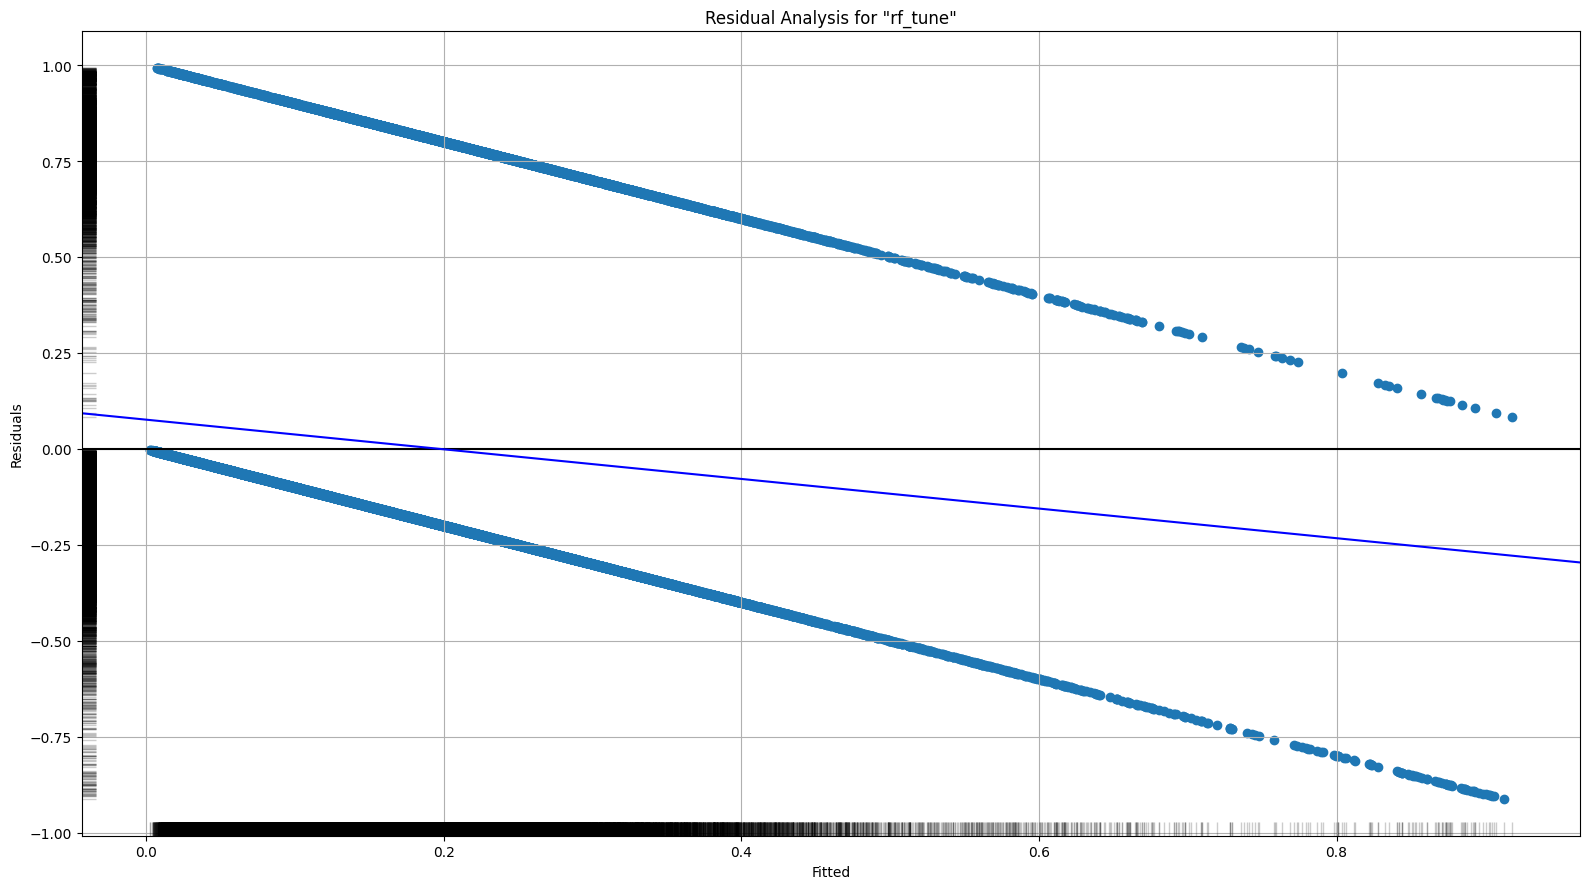

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

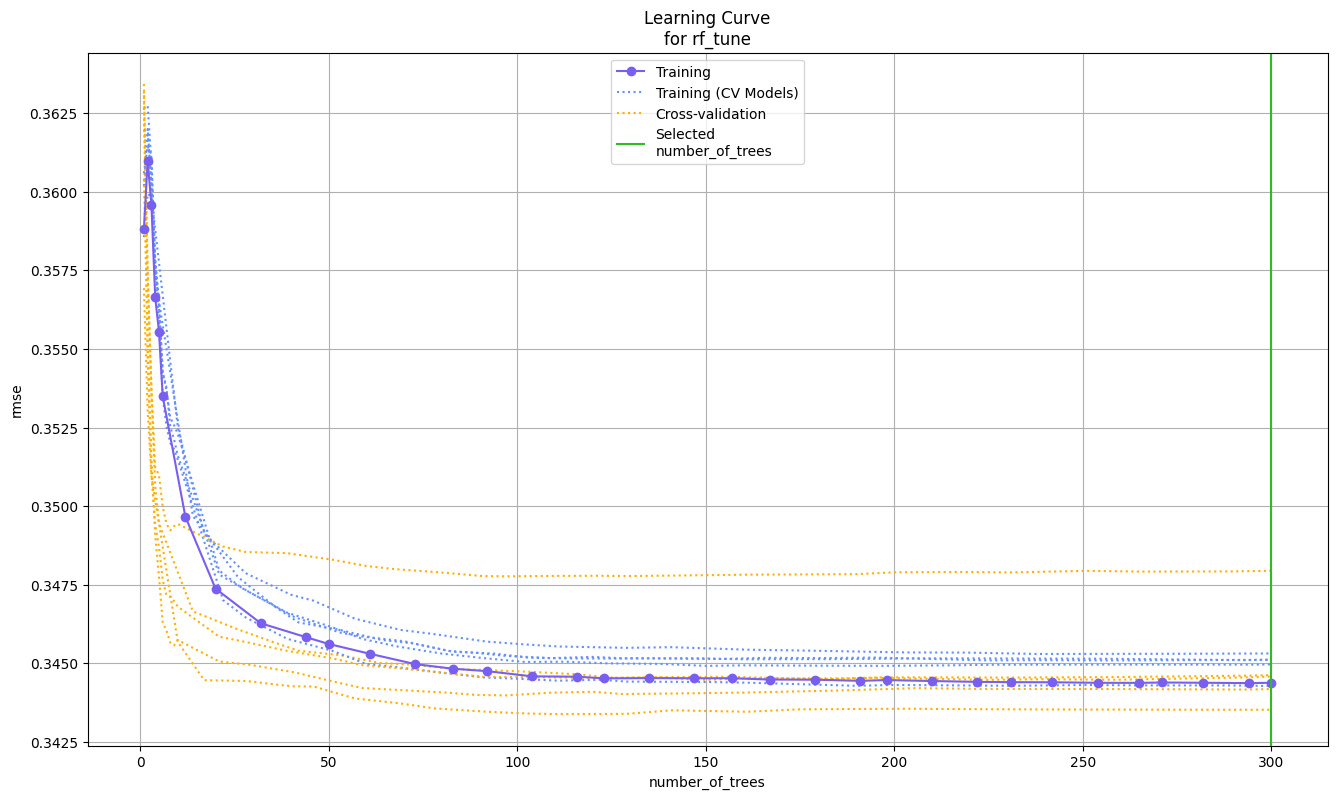

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

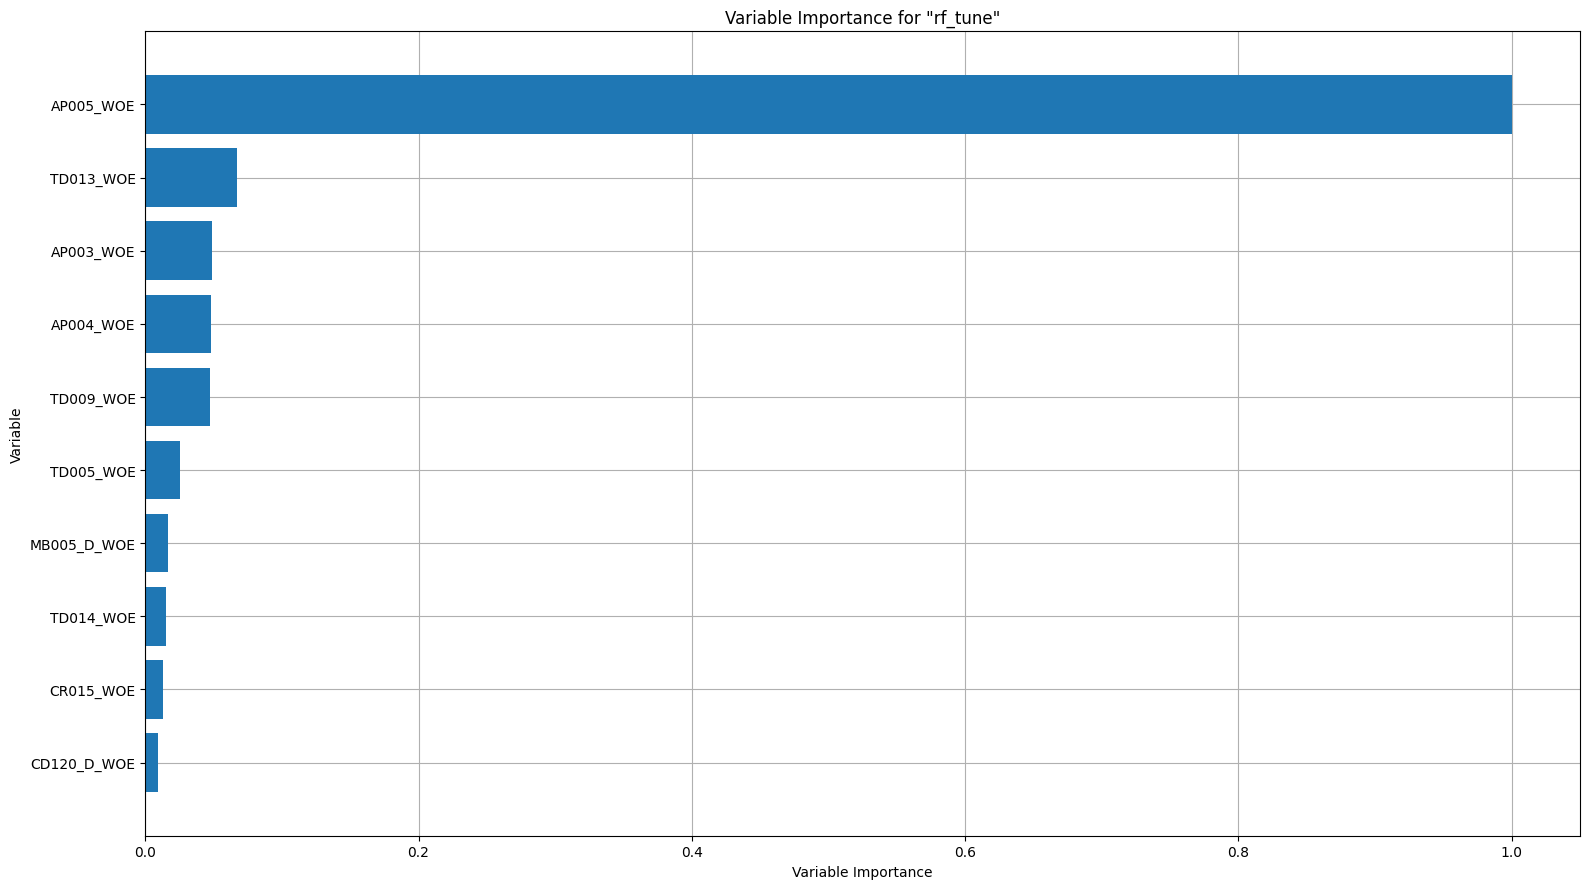

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

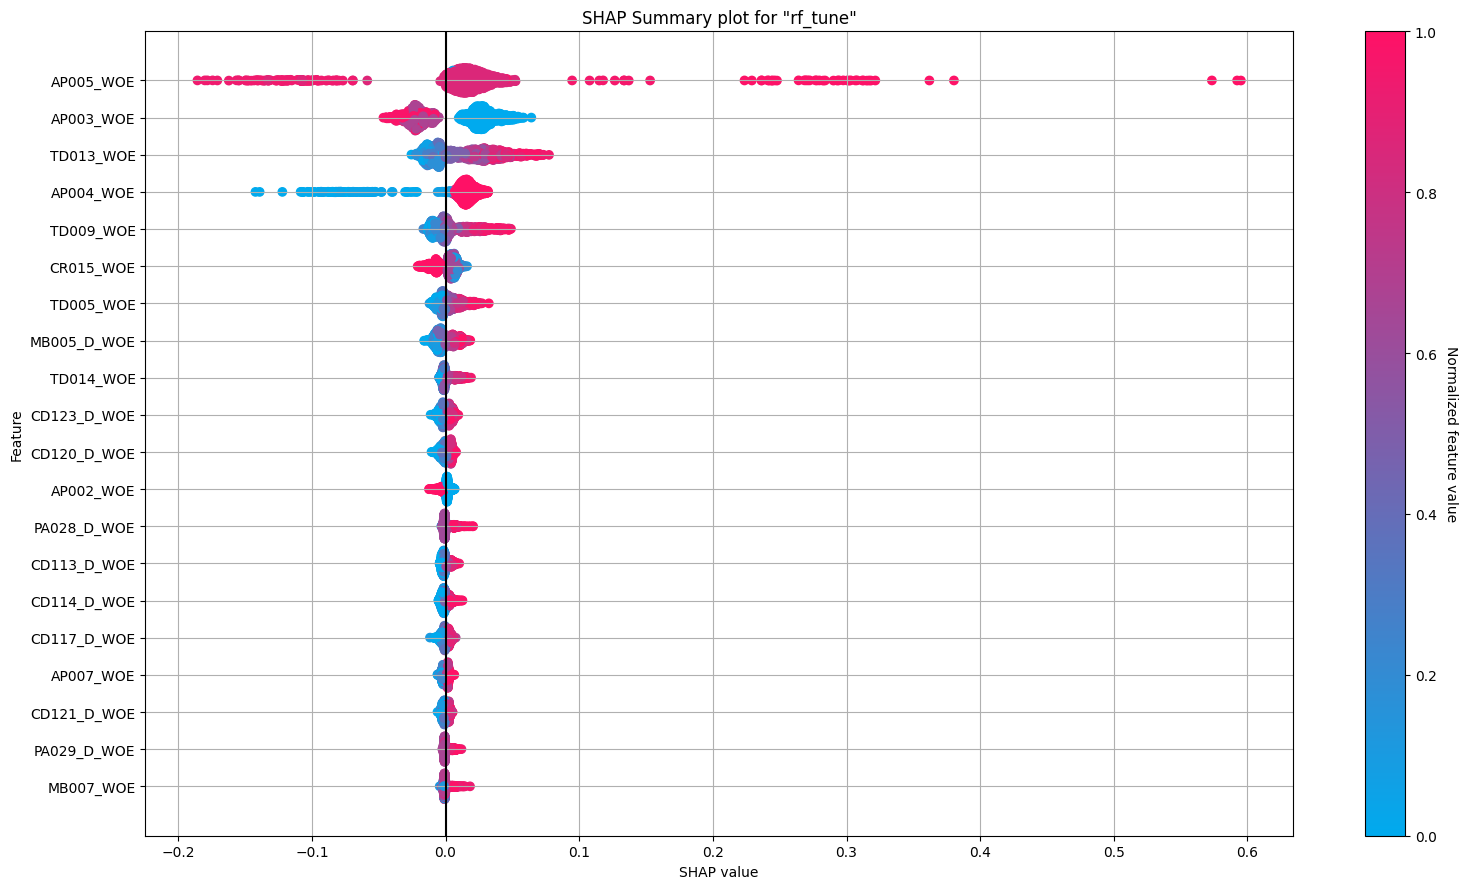

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

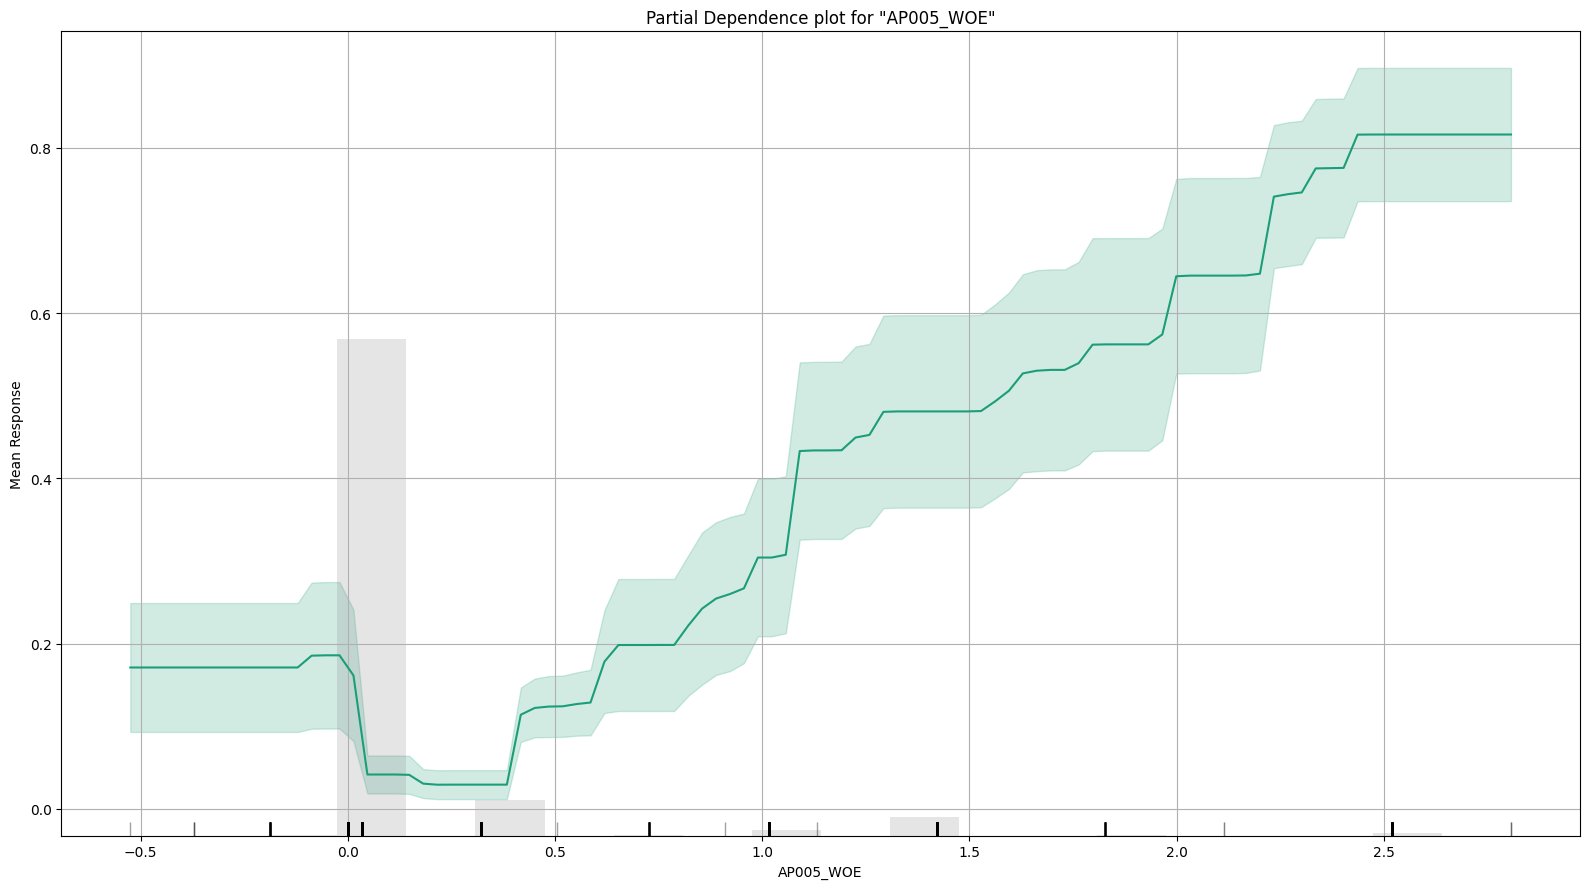

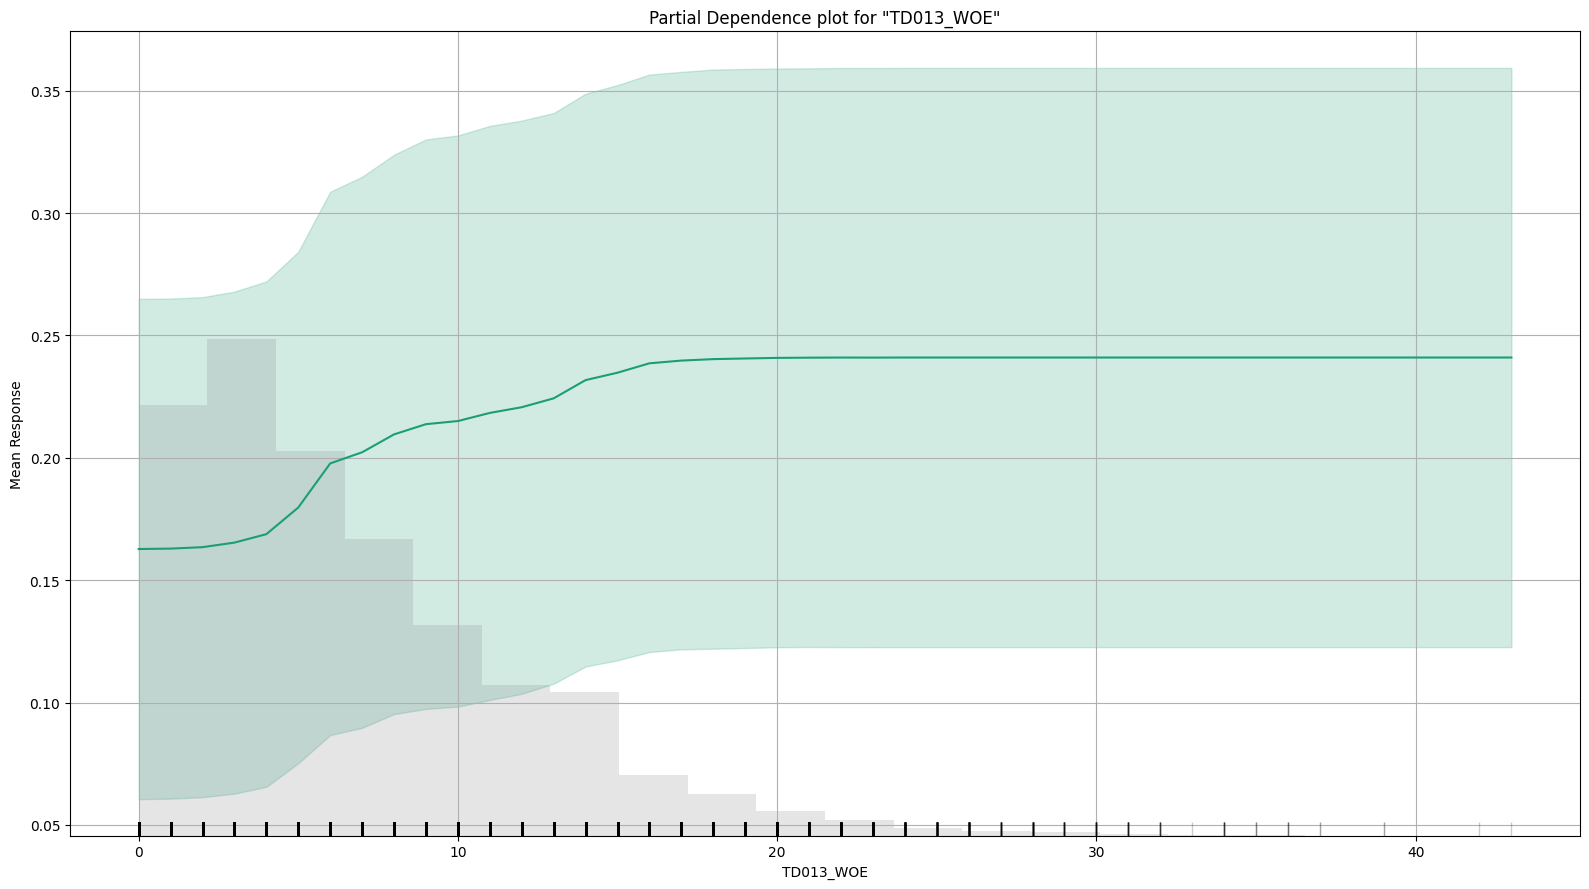

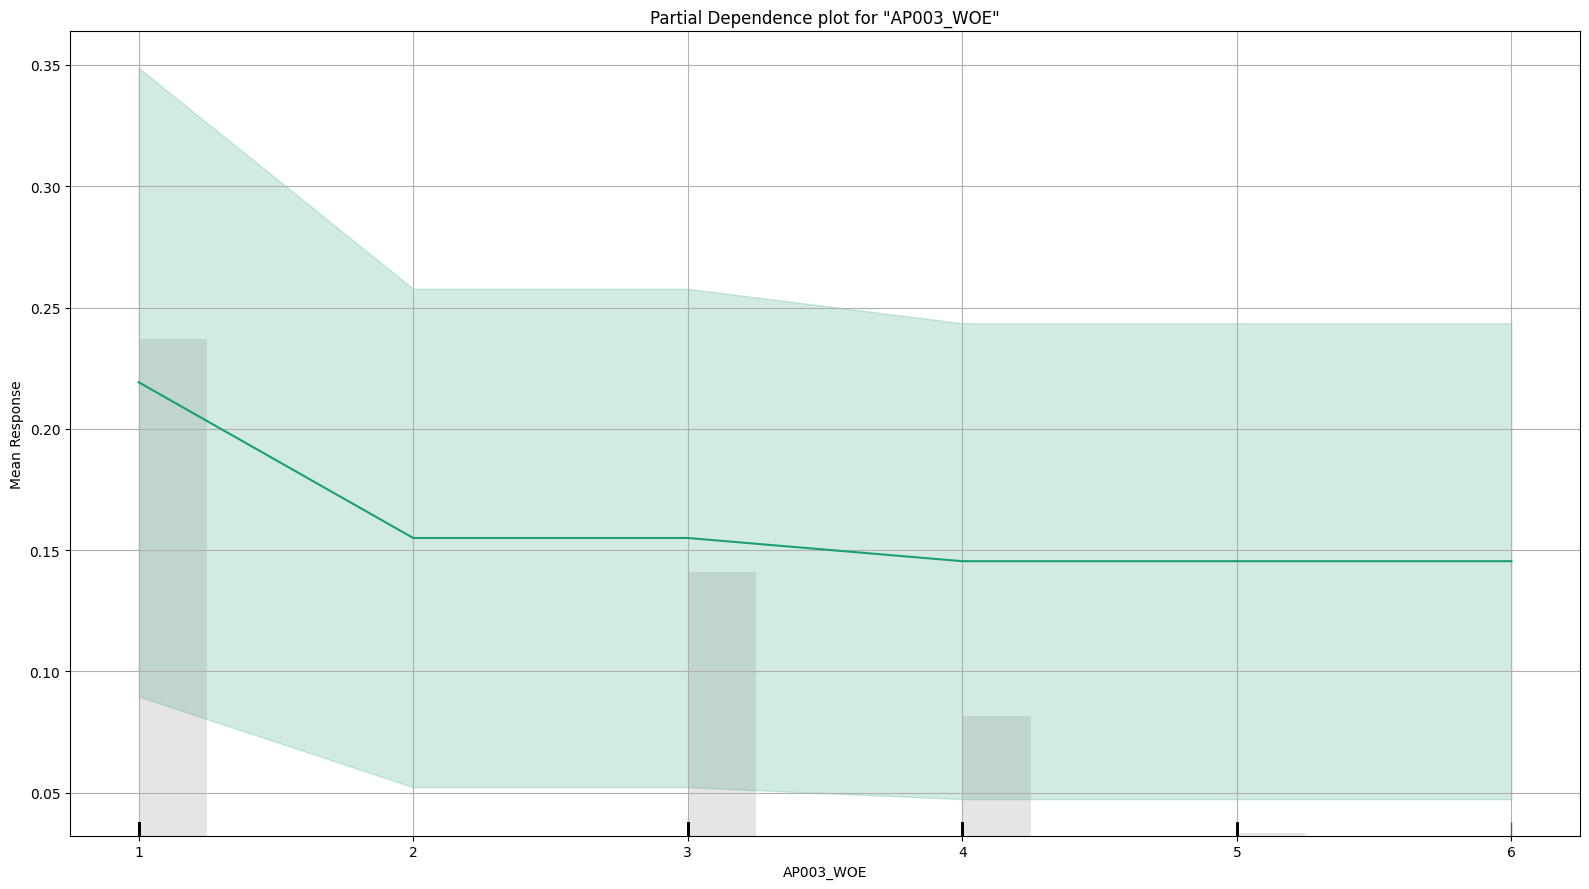

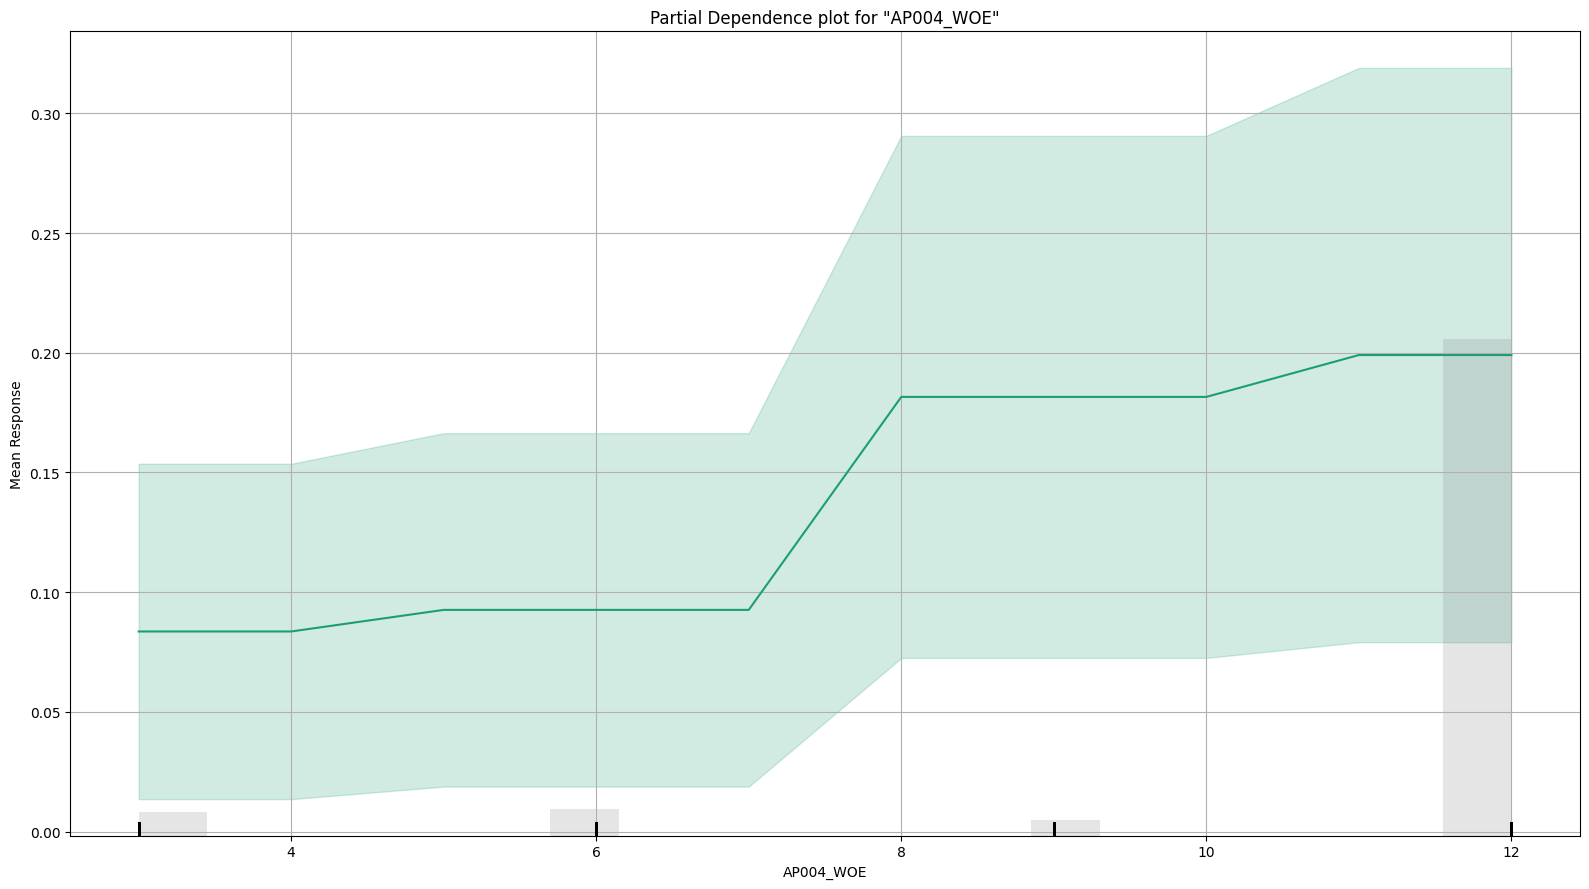

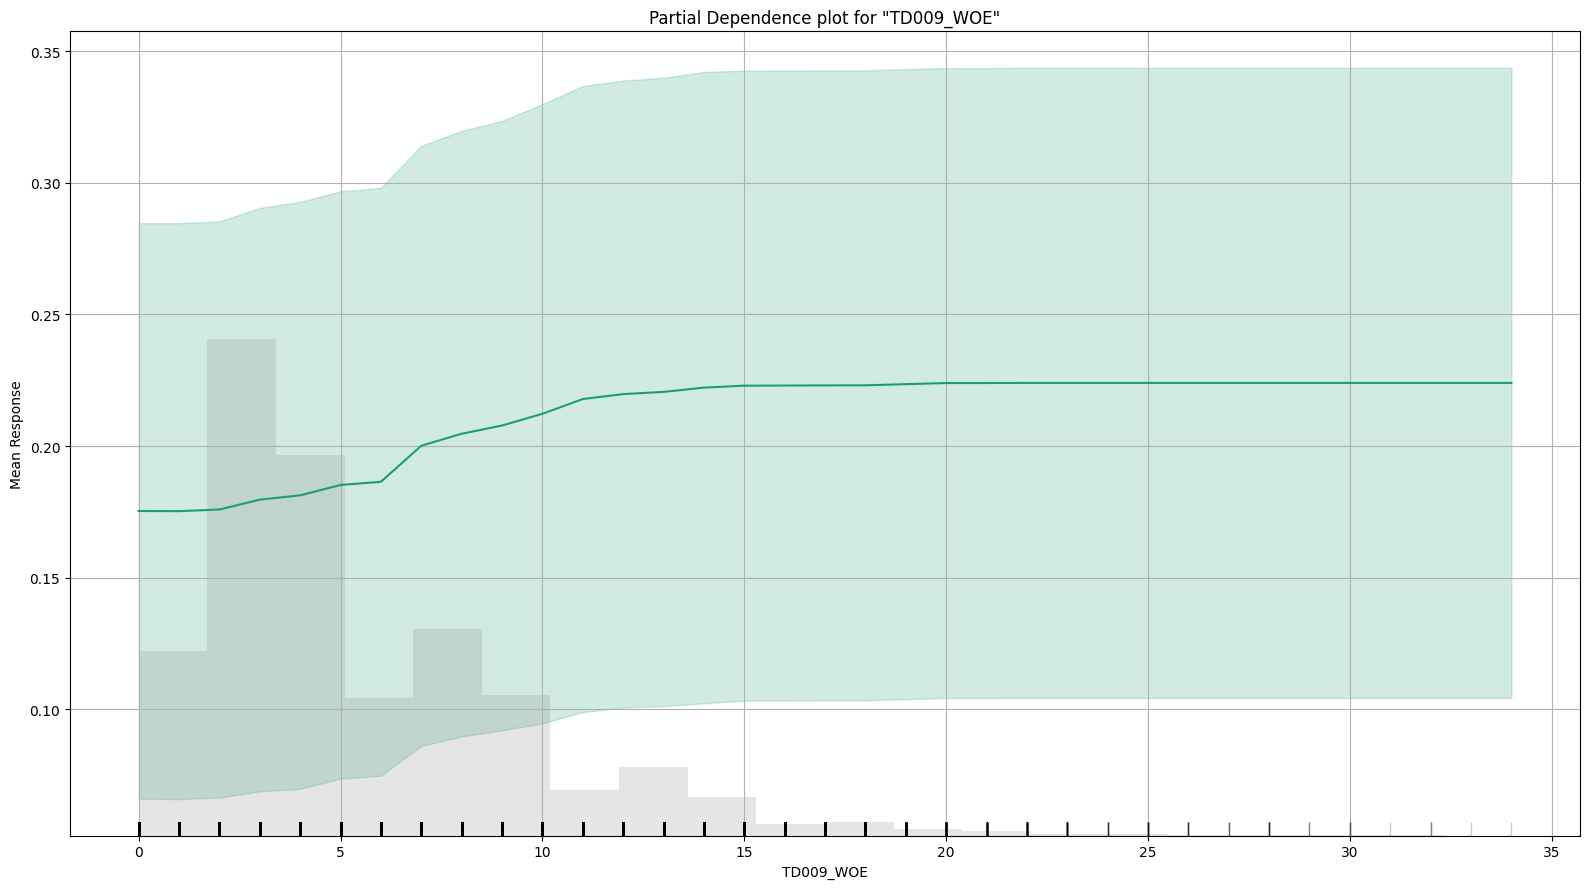

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

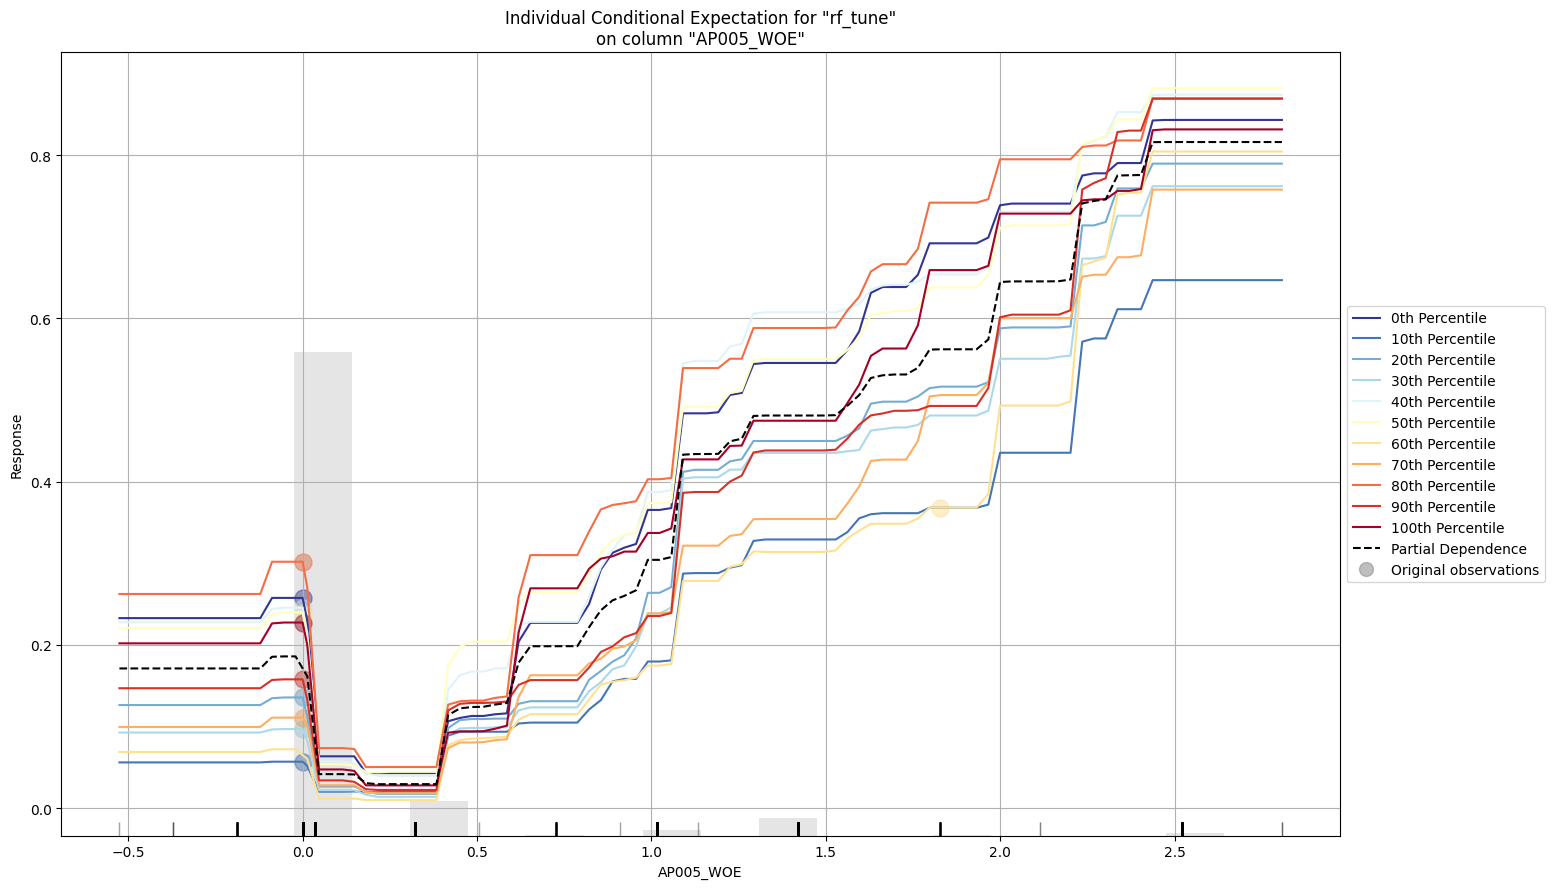

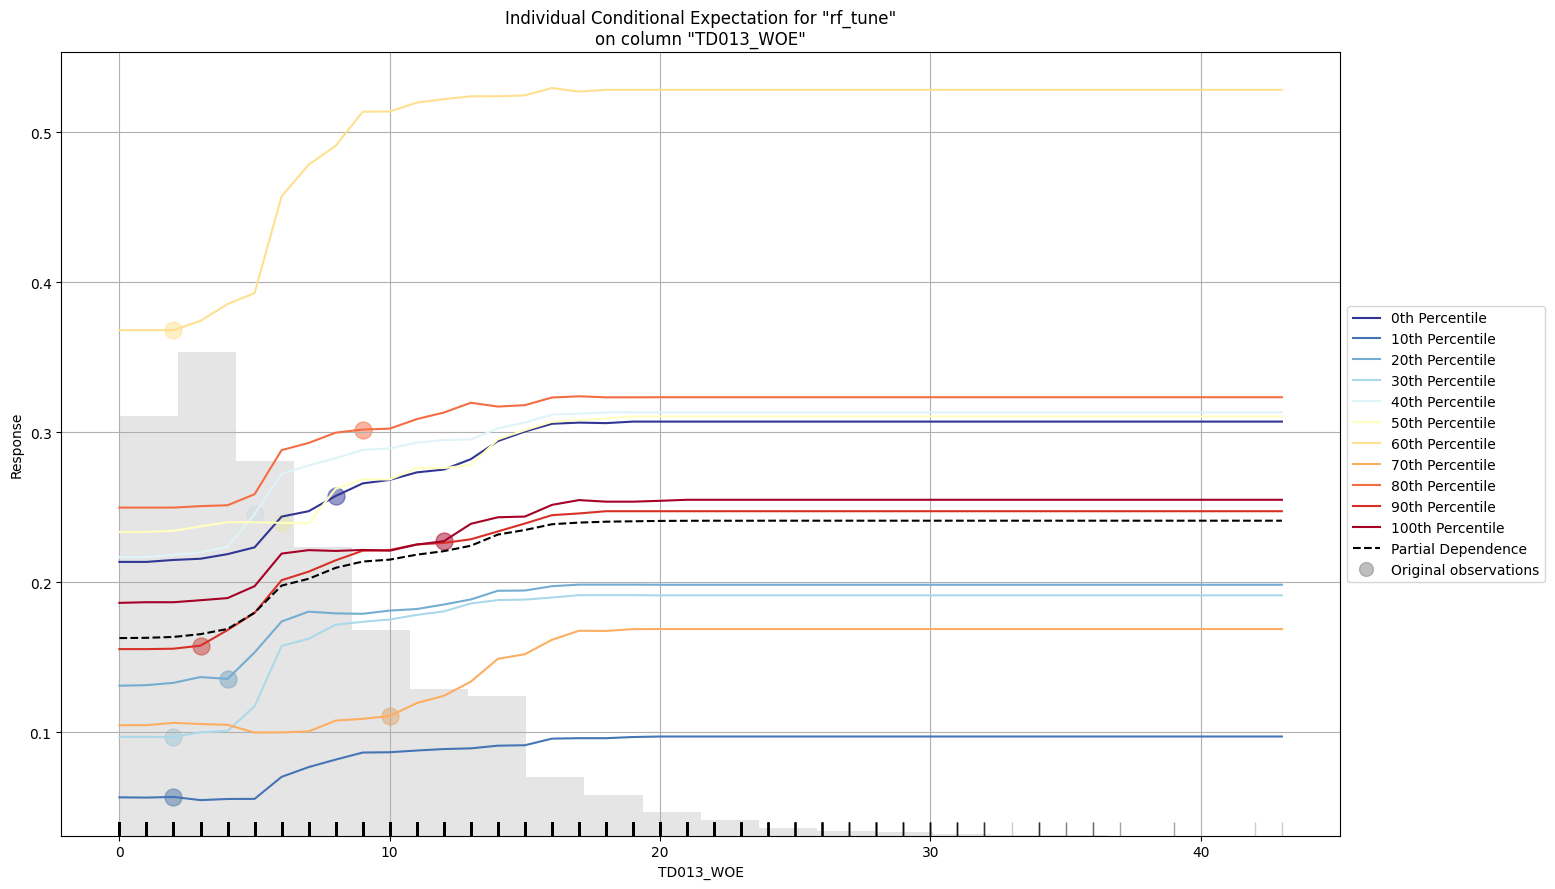

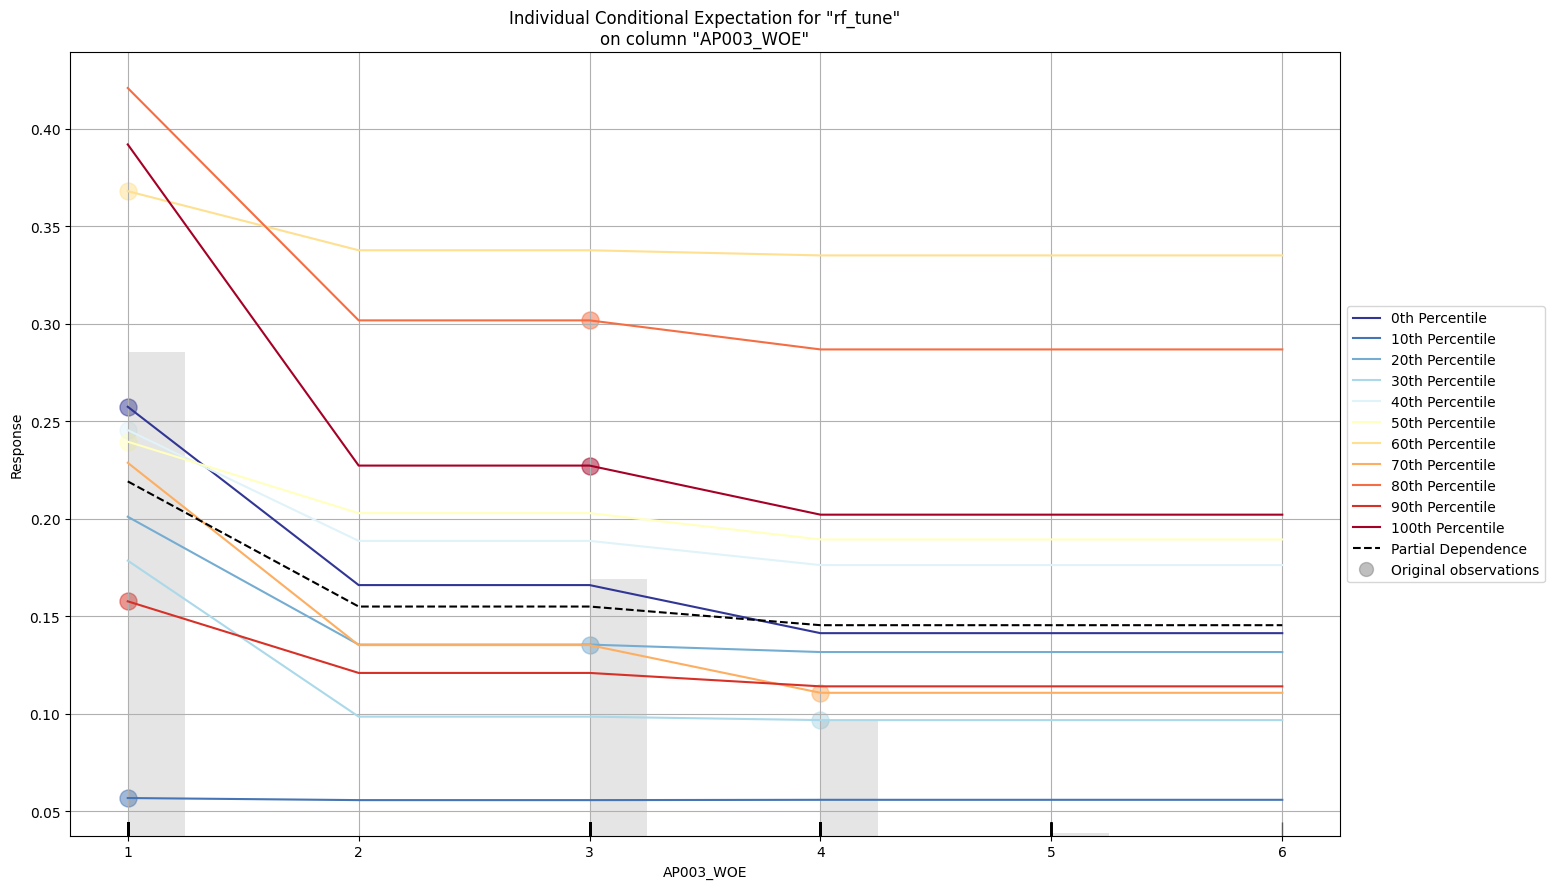

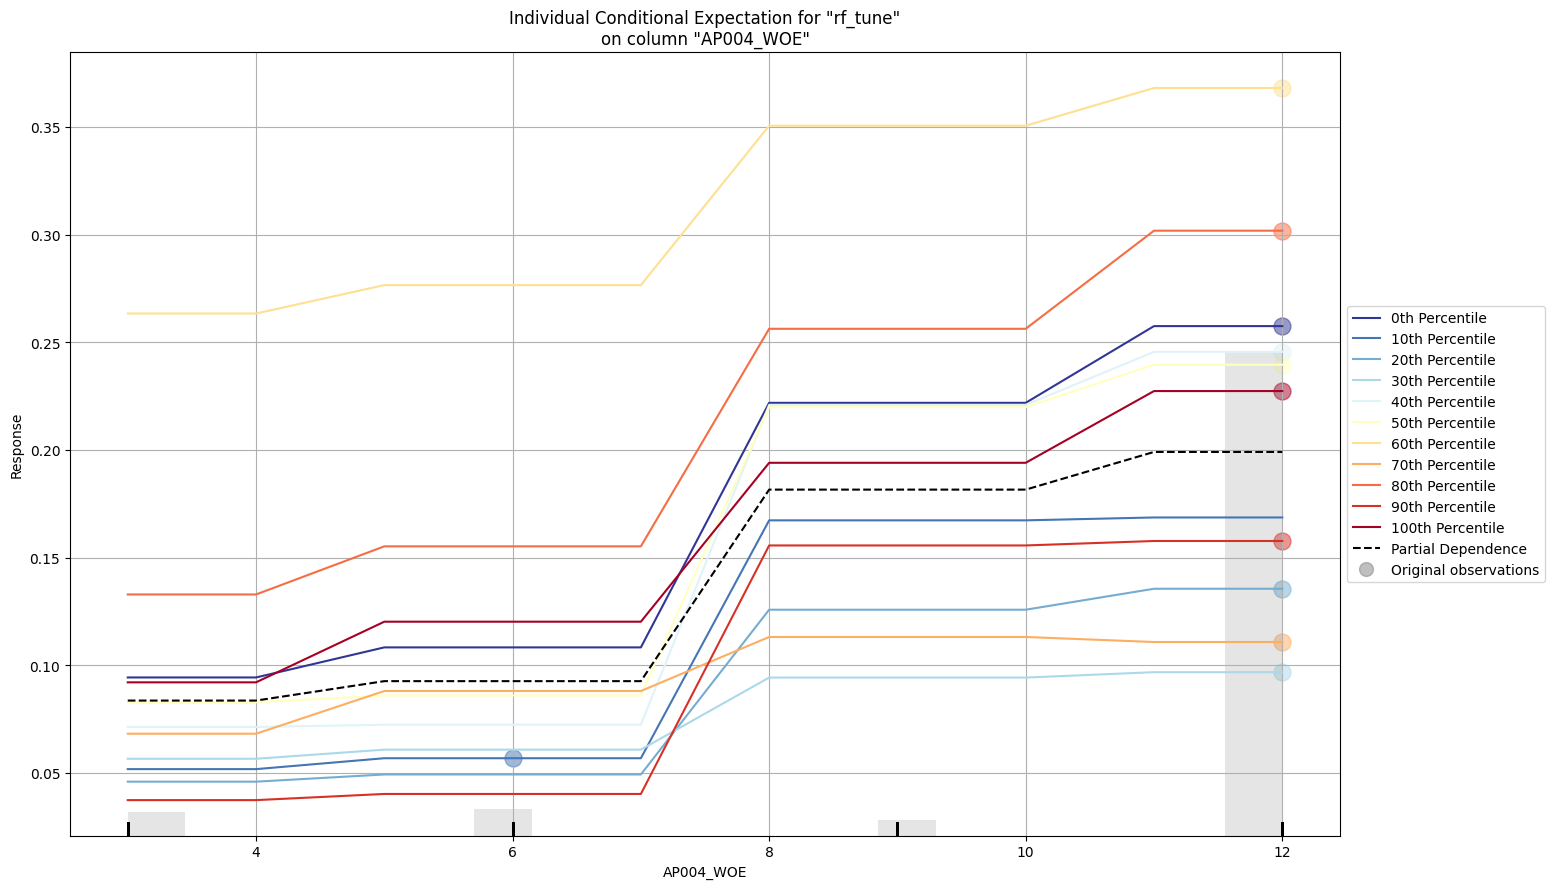

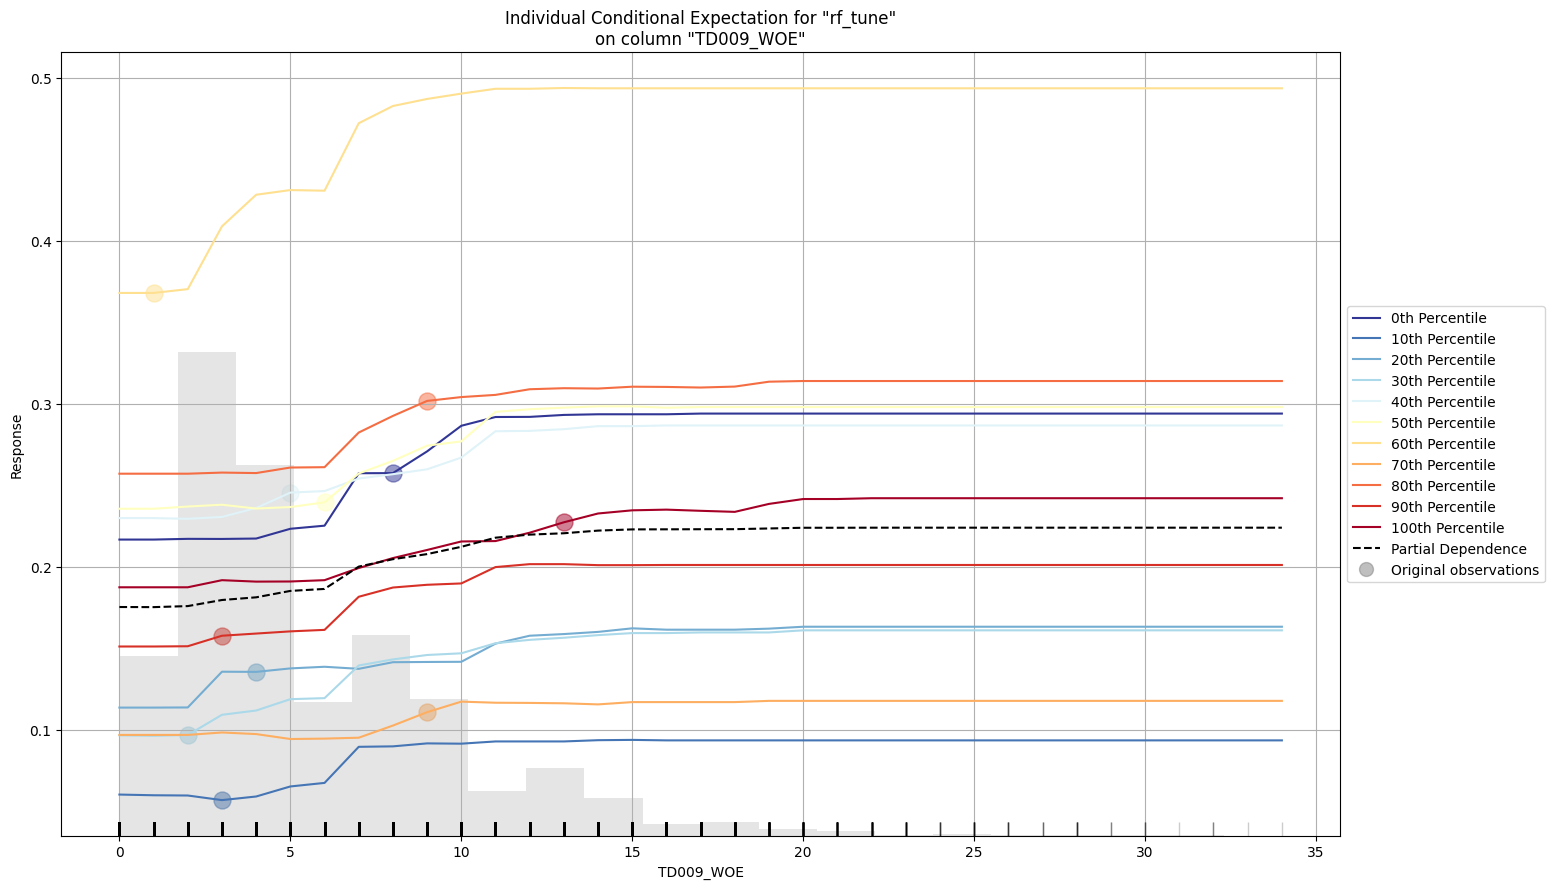

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

In [ ]:
model_explain = rf_tune.explain(test_hex)

model_explain

### Scikit_learn Random Forest Classifier

As the shap library does not support H2O models very well, we will train a new random forest model with same data(10% of it) with same hyperparameters to evaluate its SHAP values

In [30]:
# Train Test Split

# The top 10 variables we laerned from the H2O RF model
top_10_feature_names = [
    'AP005_WOE',
    'TD013_WOE',
    'AP003_WOE',
    'AP004_WOE',
    'TD009_WOE',
    'TD005_WOE',
    'MB005_D_WOE',
    'TD014_WOE',
    'CR015_WOE',
    'CD120_D_WOE'
]

# Since the full dataset required a few hours to generate sharp values, so we choose to use 10% data as sample to do further analysis
train_sample = train_woe.sample(frac = 0.1, random_state = 1)
test_sample = test_woe.sample(frac = 0.1, random_state = 1)

X_train = train_sample.loc[:, top_10_feature_names]
y_train = train_sample['loan_default']

X_test = test_sample.loc[:, top_10_feature_names]
y_test = test_sample['loan_default']

In [31]:
X_train.shape

(5600, 10)

In [42]:
X_train.head()

AP005_WOE  TD013_WOE  AP003_WOE  AP004_WOE  TD009_WOE  TD005_WOE  \
70987   0.000000         14          3         12         12          9   
4329    0.000000          2          1         12          2          2   
75947   0.322052         11          1          6          8          3   
32603   0.000000          2          1         12          2          2   
4186    0.000000          1          1         12          1          1   

       MB005_D_WOE  TD014_WOE  CR015_WOE  CD120_D_WOE  
70987    -0.059157          6          5     0.117257  
4329      0.179754          2          6     0.117257  
75947    -0.213928          5          6    -0.177131  
32603     0.258996          2          5     0.134225  
4186     -0.138429          0          5    -0.361356

In [53]:
X_test.shape

(2400, 10)

In [33]:
# Train the scikit-learn RF model
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 300, max_depth = 15, min_samples_split= 50)

rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, min_samples_split=50, n_estimators=300)

In [34]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 5.1 MB/s eta 0:00:00


In [35]:
# Generate the SHAP values of the new RF model

import shap

shap_values = shap.TreeExplainer(rf).shap_values(X_train)

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [36]:
shap_values

array([[ 4.77293754e-03, -2.73801288e-02, -4.98056108e-02, ...,
         4.91385741e-02,  4.89080960e-03,  4.37725739e-03],
       [-4.13959044e-03, -3.29069641e-02,  3.24627658e-02, ...,
         4.74821577e-03, -2.19601444e-02,  1.18068987e-02],
       [-1.47752336e-01,  1.11529326e-02,  8.35954150e-03, ...,
         5.12173074e-03, -6.50183578e-03, -1.03133871e-02],
       ...,
       [ 6.16823133e-02,  7.08061708e-02, -5.20263147e-02, ...,
         1.04000385e-01,  1.07640973e-02,  1.05121344e-03],
       [ 2.81734001e-02,  1.32641684e-02,  4.44806684e-02, ...,
         2.07368365e-04,  1.55274908e-02,  8.43212052e-03],
       [-2.66291780e-01,  2.73384956e-02,  1.59300277e-02, ...,
         4.65051196e-03, -1.07330108e-02,  6.31268519e-03]])

### * Two 'groups' fo shap_values
I used to a binary classifier(RandomForestClassifier), the prediction output of the model are in two calsses: 0 and 1(non-default and default). And the SHAP values are also classified into two groups, the effect to 0 and to 1. Evaluation both groups of prediction output will cause conflict in some SHAP evalution steps, so we can choose to only evaluate the 'default'(1) group here. Shown as "shap_values[1]".  
This has been resolved after I transfer to use RandomForestRegressor now.

### SHAP Importance Plot & Positive/Negative Relationships

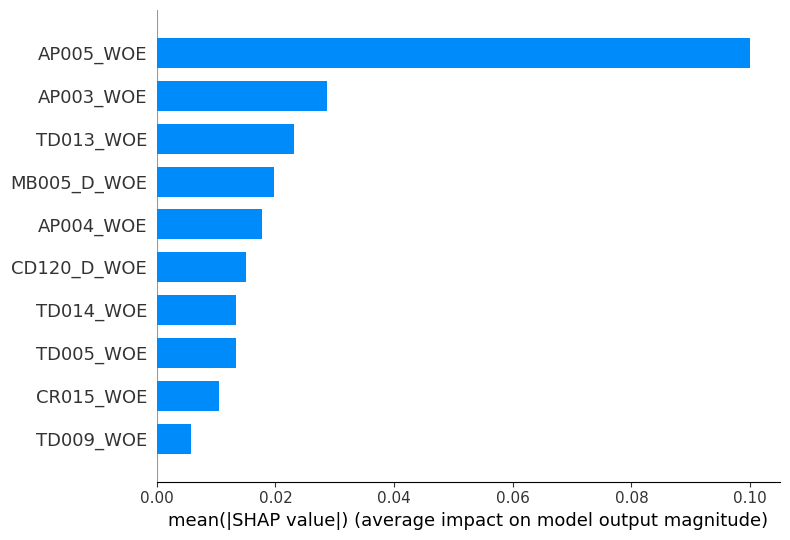

In [38]:
# Show the Variable Importance

shap.summary_plot(shap_values, X_train, plot_type = 'bar')

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


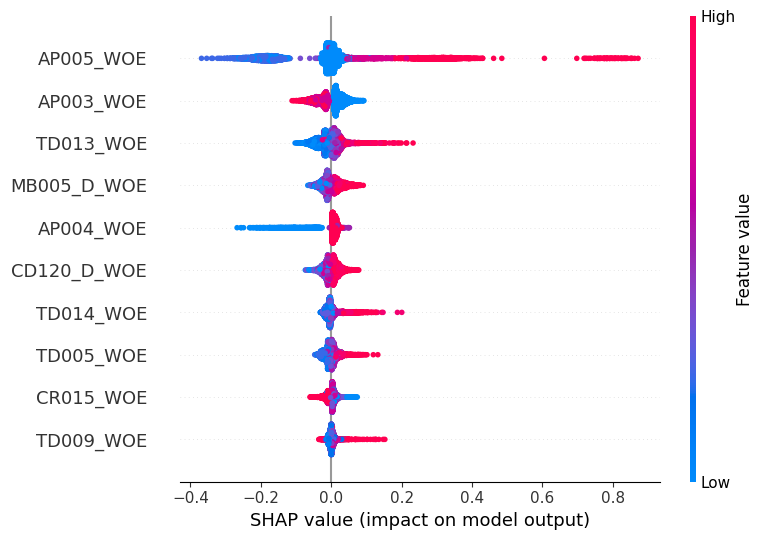

In [39]:
shap.summary_plot(shap_values,X_train)

#### Summary of the Top 5 Variables  
Here are the Top 5 variables I am going to evaluate here and in later sections: ['AP005_WOE', 'AP003_WOE', 'TD013_WOE', 'MB005_D_WOE', 'AP004_WOE']  
1, 'AP005_WOE' is the variable with the most importance that help to detected if loan going to be defaulted. It has a positive relationship with default loan. This means, with higher 'AP005_WOE', the loan is more likely to be defaulted. This varibale has wider distribution with higher values.  
2, 'AP003_WOE' is the seocnd important varibale and the only variable that has negative relationship with the target among the Top 5 variables. This means with higher 'AP003_WOE', lower the possibility of default loan. This varibale has similiar distribution between higher and lower values.  
3, 'TD013_WOE'is the third important variable. It has positive relationship with the target. This means, with larger 'TD013_WOE' the loan is more likely to be defaulted.  This varibale has wider distribution with higher values.   
4, 'MB005_D_WOE'is the third important variable. It has positive relationship with the target. This means, with larger 'MB005_D_WOE' the loan is more likely to be defaulted. This varibale has wider distribution with higher values.   
5, 'AP004_WOE'is the third important variable. It has positive relationship with the target. This means, with larger 'AP004_WOE' the loan is more likely to be defaulted. This varibale has wider distribution with lower values.

### SHAP Dependence Plot

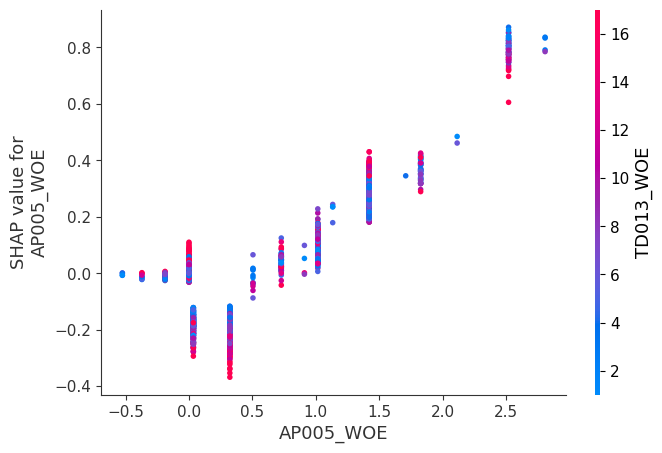

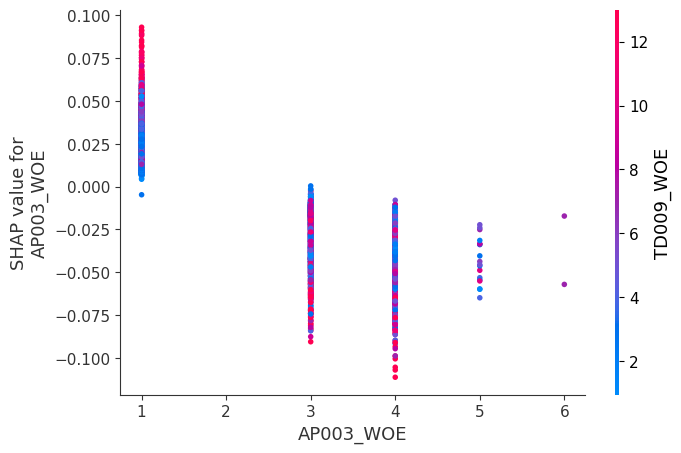

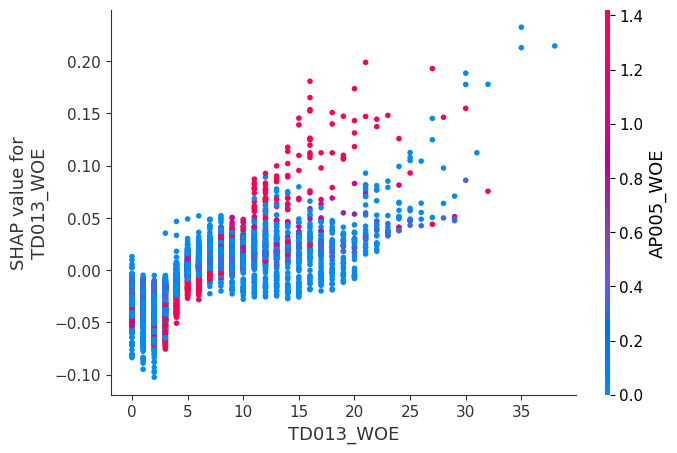

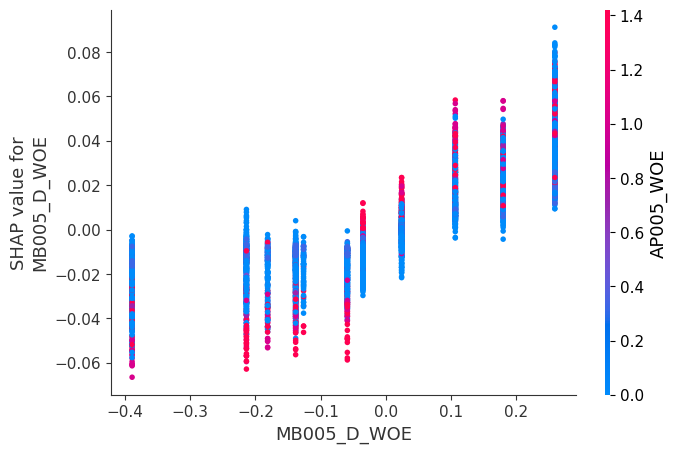

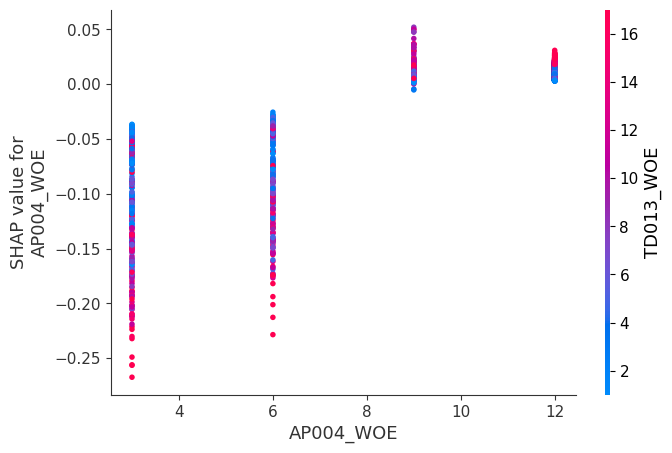

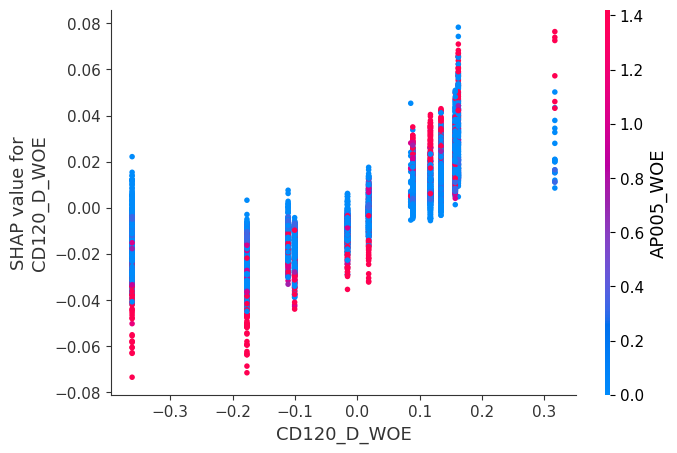

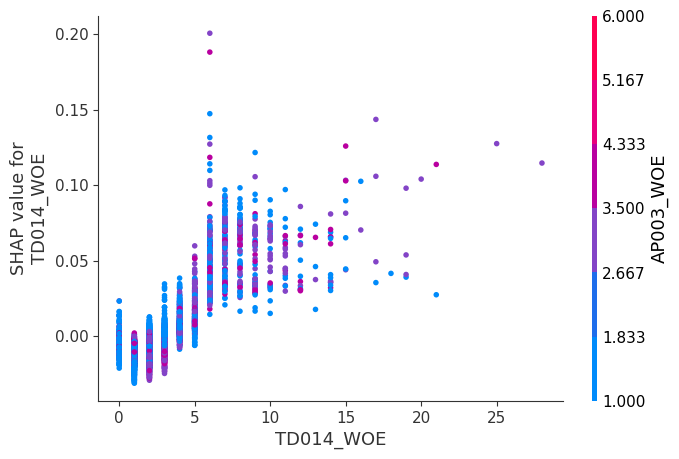

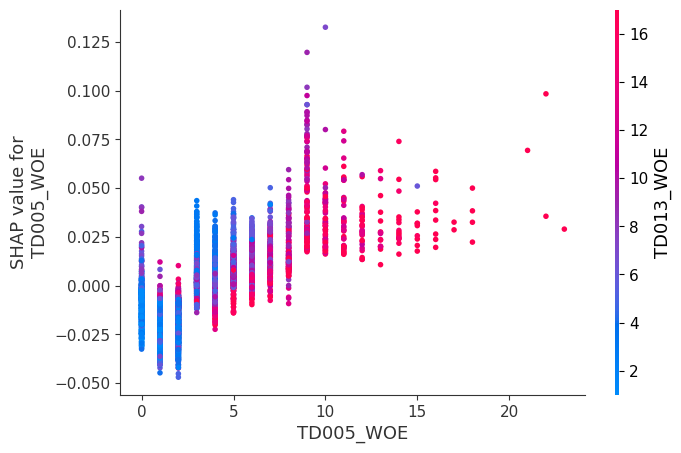

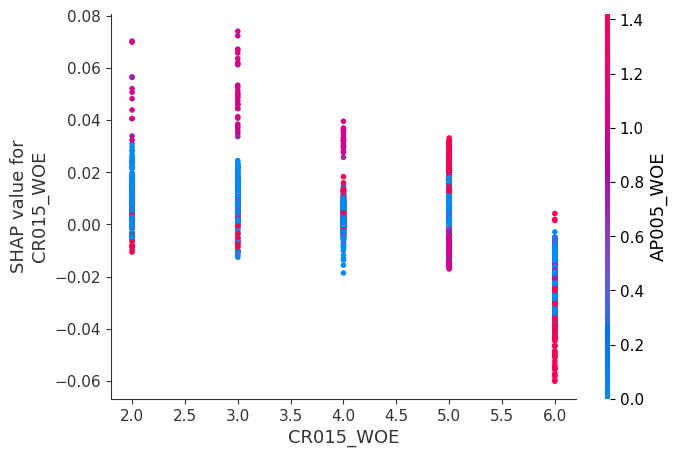

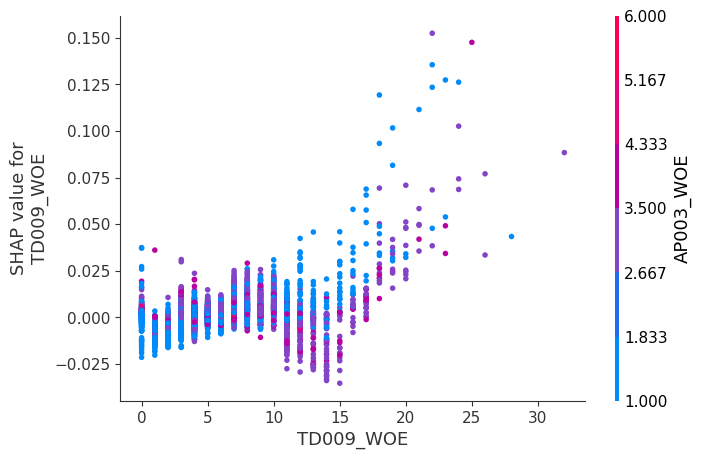

In [49]:
shap.dependence_plot("AP005_WOE", shap_values, X_train)
shap.dependence_plot("AP003_WOE", shap_values, X_train)
shap.dependence_plot("TD013_WOE", shap_values, X_train)
shap.dependence_plot("MB005_D_WOE", shap_values, X_train)
shap.dependence_plot("AP004_WOE", shap_values, X_train)
shap.dependence_plot("CD120_D_WOE", shap_values, X_train)
shap.dependence_plot("TD014_WOE", shap_values, X_train)
shap.dependence_plot("TD005_WOE", shap_values, X_train)
shap.dependence_plot("CR015_WOE", shap_values, X_train)
shap.dependence_plot("TD009_WOE", shap_values, X_train)

#### Result  
1, The plot of "AP005_WOE" shows there is an approximately linear(not clear due to the samll sample of data) and positive trend between "AP005_WOE" and the target variable, and "AP005_WOE" interacts with "TD013_WOE" frequently.  
2, The plot of "AP003_WOE" shows there is an approximately linear(not clear due to the samll sample of data) and negative trend between "AP003_WOE" and the target variable, and "AP003_WOE" interacts with "TD009_WOE" frequently.  
3, The plot of "TD013_WOE" shows there is an approximately linear(not clear due to the samll sample of data) and positive trend between "TD013_WOE" and the target variable, and "TD013_WOE" interacts with "AP005_WOE" frequently.  
4, The plot of "MB005_D_WOE" shows there is an approximately linear(not clear due to the samll sample of data) and positive trend between "MB005_D_WOE" and the target variable, and "MB005_D_WOE" interacts with "AP005_WOE" frequently.  
5, The plot of "AP004_WOE" shows there is an approximately linear(not clear due to the samll sample of data) and positive trend between "AP004_WOE" and the target variable, and "AP004_WOE" interacts with "TD013_WOE" frequently.


### SHAP Force Plot

In [41]:
# Randomly pick some observations
random_pick = np.arange(1, 2400, 100)
#random_pick
S = X_test.iloc[random_pick]
S

AP005_WOE  TD013_WOE  AP003_WOE  AP004_WOE  TD009_WOE  TD005_WOE  \
49943   0.000000         18          1         12         13          6   
79469   0.000000         10          1         12          9          3   
27683   0.000000          4          1         12          3          3   
47273   0.000000         11          1         12          6          2   
51538   0.000000          1          1         12          1          1   
15917   0.000000          2          1         12          2          2   
27803   0.322052          1          1         12          1          1   
68531   0.000000          4          1         12          4          2   
74752   0.000000         13          3         12         11          4   
34246   0.000000          8          1          6          8          6   
7055    0.000000          5          3         12          5          5   
57101   0.322052          2          1         12          2          2   
7628    0.000000          6          1         12          5          5   
30489   0.000000          0          1         12          0          0   
55528   0.000000          3          1         12          3          3   
36270   0.000000         22          3          3         14          6   
11608   0.000000          2          1         12          2          2   
74343   0.000000          7          3         12          6          6   
4220    0.000000          5          4         12          6          4   
63782   0.000000          6          1         12          1          1   
48921   0.000000         10          1         12         10          8   
26974   0.000000          0          1         12          2          2   
72603   0.000000          7          4         12          5          3   
2766    0.000000          4          1         12          2          2   

       MB005_D_WOE  TD014_WOE  CR015_WOE  CD120_D_WOE  
49943    -0.389213          5          5    -0.015787  
79469    -0.181408          6          5    -0.111075  
27683     0.258996          2          6    -0.111075  
47273     0.258996          1          5     0.018149  
51538     0.258996          2          5     0.134225  
15917    -0.035264          1          5     0.134225  
27803    -0.389213          0          5    -0.361356  
68531    -0.035264          1          5     0.088931  
74752    -0.213928          7          6    -0.111075  
34246     0.258996          3          6     0.117257  
7055     -0.035264          0          3     0.157115  
57101    -0.389213          0          5     0.117257  
7628     -0.181408          2          5    -0.111075  
30489    -0.213928          0          5    -0.177131  
55528    -0.126299          1          3     0.134225  
36270     0.024047          6          5     0.018149  
11608     0.024047          0          5    -0.361356  
74343    -0.213928          1          6     0.088931  
4220      0.179754          1          6     0.134225  
63782     0.106374          1          5     0.018149  
48921    -0.059157          2          6    -0.015787  
26974    -0.059157          0          5     0.088931  
72603    -0.035264          2          6    -0.100569  
2766     -0.035264          2          6    -0.015787

In [42]:
# Initialize the notebook with JavaScript visualization
shap.initjs()

# Define the SHAP plotting function
def shap_plot(j):
    explainerModel = shap.TreeExplainer(rf)
    shap_values_Model = explainerModel.shap_values(S)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], S.iloc[[j]])
    return p

In [48]:
column_averages = X_test.mean()

print(column_averages)

AP005_WOE       0.091289
TD013_WOE       6.780833
AP003_WOE       2.009583
AP004_WOE      11.263750
TD009_WOE       5.366667
TD005_WOE       3.549583
MB005_D_WOE    -0.006528
TD014_WOE       2.610000
CR015_WOE       4.875417
CD120_D_WOE    -0.007831
dtype: float64


In [44]:
shap.initjs()

shap_plot(0)

The base value is 0.1912 which is “the value that would be predicted if we did not know any features for the current output.” The read variablesare the ones that larger than average, expect AP003_WOE is lass than avergae(reversed relationship explained above), which pushes the prediction to the right(higher). And the blue variables are the varibles less than avergae which pushes the prediction to the left(lower). Thus, the final prediction is 0.25.  
AP005_WOE: Should be greater than avergae (cannot garentee since it is shown as integar 0 here)  
AP003_WOE: 1 < 2.009(avergae)  
TD013_WOE: 18 > 6.780(average)  
MB005_D_WOE: -0.2892 < -0.0065(average)  
AP004_WOE: 12 > 11.263(average)

In [45]:
shap.initjs()

shap_plot(1)

The base value is 0.1912 which is “the value that would be predicted if we did not know any features for the current output.” The read variablesare the ones that larger than average, expect AP003_WOE is lass than avergae(reversed relationship explained above), which pushes the prediction to the right(higher). And the blue variables are the varibles less than avergae which pushes the prediction to the left(lower). Thus, the final prediction is 0.21.  
AP005_WOE: Should be greater than avergae (cannot garentee since it is shown as integar 0 here)  
AP003_WOE: 1 < 2.009(avergae)  
TD013_WOE: 10 > 6.780(average)  
MB005_D_WOE: -0.1814 < -0.0065(average)  
AP004_WOE: 12 > 11.263(average)

In [46]:
shap.initjs()

shap_plot(2)

The base value is 0.1912 which is “the value that would be predicted if we did not know any features for the current output.” The red variablesare the ones that larger than average, expect AP003_WOE is lass than avergae(reversed relationship explained above), which pushes the prediction to the right(higher). And the blue variables are the varibles less than avergae which pushes the prediction to the left(lower). Thus, the final prediction is 0.22.  
AP005_WOE: Should be greater than avergae (cannot garentee since it is shown as integar 0 here)  
AP003_WOE: 1 < 2.009(avergae)  
TD013_WOE: 4 < 6.780(average)  
MB005_D_WOE: 0.259 > -0.0065(average)  
AP004_WOE: 12 > 11.263(average)

In [47]:
shap.initjs()

shap_plot(3)

The base value is 0.1912 which is “the value that would be predicted if we did not know any features for the current output.” The red variablesare the ones that larger than average, expect AP003_WOE is lass than avergae(reversed relationship explained above), which pushes the prediction to the right(higher). And the blue variables are the varibles less than avergae which pushes the prediction to the left(lower). Thus, the final prediction is 0.37.  
AP005_WOE: Should be greater than avergae (cannot garentee since it is shown as integar 0 here)  
AP003_WOE: 1 < 2.009(avergae)  
TD013_WOE: 11 > 6.780(average)  
MB005_D_WOE: 0.259 < -0.0065(average)  
AP004_WOE: 12 > 11.263(average)

In [50]:
%%shell
jupyter nbconvert --to html /content/Assignment_11.ipynb

[NbConvertApp] Converting notebook /content/Assignment_11.ipynb to html
[NbConvertApp] Writing 5171521 bytes to /content/Assignment_11.html
